# Latar Belakang
Airbnb Bangkok mengalami penurunan jumlah pengguna dalam beberapa tahun terakhir. Salah satu penyebab utamanya adalah meningkatnya persaingan dari platform alternatif seperti **Booking.com**, **ThaiApartment**, dan **RentHub** yang secara strategis menargetkan ceruk pasar berbeda. **Booking.com** menarik wisatawan jangka pendek dengan variasi hotel dan proses pemesanan yang mudah. **ThaiApartment** unggul di kalangan penyewa jangka menengah dan bulanan karena menawarkan apartemen lokal. Sementara itu, **RentHub** berhasil menarik segmen berbiaya rendah dengan harga kompetitif dan kemudahan akses.

Dalam kondisi ini, **divisi Pemasaran dan Digital Marketing Airbnb Bangkok** dihadapkan pada tantangan ganda: **mengembalikan visibilitas merek** serta **meningkatkan konversi pengguna** di tengah lanskap kompetitor yang semakin terfragmentasi dan tersegmentasi. Untuk itu, dibutuhkan strategi yang **berbasis data**, yang mampu **mengidentifikasi elemen-elemen penawaran yang paling memengaruhi preferensi pelanggan** dalam memilih jenis akomodasi di platform Airbnb dibandingkan pesaing.

## Rumusan Masalah
Fokus analisis ini ditujukan untuk membantu **manajer pemasaran dan digital marketing** dalam:
1. **Analisis Berdasarkan Jenis Kamar**  
   Bagaimana performa masing-masing tipe kamar dalam memengaruhi minat, preferensi, dan tingkat keterlibatan pengguna pada platform Airbnb Bangkok?
2. **Analisis Berdasarkan Segmentasi Harga**  
   Bagaimana peran segmentasi harga dalam membentuk persepsi pelanggan terhadap nilai akomodasi serta kecenderungan mereka dalam memberikan ulasan?
3. **Analisis untuk Meningkatkan Keterlibatan Pelanggan (Customer Engagement)**  
   Strategi apa yang paling efektif untuk meningkatkan tingkat partisipasi pelanggan, khususnya dalam memberikan ulasan, serta memperkuat loyalitas melalui optimalisasi interaksi digital?


Dataset ini berisi informasi terkait properti properti di platform Airbnb di suatu kota atau wilayah, termasuk detail pemilik, lokasi, tipe akomodasi, dan aktivitas pemesanan. Terdapat 14 kolom di dalam dataset ini, yaitu:

- id: ID unik untuk tiap properti di Airbnb
- name: Judul properti properti seperti yang ditampilkan di platform Airbnb
- host_id: ID unik untuk tiap host (pemilik propertii)
- host_name: Nama host, biasanya hanya nama depan
- neighborhood: Nama lingkungan atau distrik tempat properti berada
- latitude: Koordinat lintang lokasi properti
- longitude: Koordinat bujur lokasi properti
- room_type: Tipe kamar dari properti, terdiri dari 4 kategori utama: Entire home/apt, Private room, Shared room, dan Hotel
- price: Harga per malam dalam mata uang lokal (simbol $ dapat muncul meskipun bukan USD)
- minimum_nights: Jumlah minimum malam yang harus dipesan dalam satu reservasi
- number_of_reviews: Jumlah total review yang diterima properti
- last_review: Tanggal review terbaru yang diterima properti
- calculated_host_listings_count: Jumlah propertii lain yang dimiliki oleh host di wilayah yang sama
- availability_365: Jumlah hari dalam setahun di mana properti tersedia untuk disewa (0–365 hari)
- number_of_reviews_ltm: Jumlah review yang diterima properti dalam 12 bulan terakhir

## **Dataset Airbnb propertis Bangkok**

Dataset ini diambil dari file `airbnb_properti_bangkok.csv`. Kolom `Unnamed: 0` digunakan sebagai index untuk mencegah pandas membuat index otomatis saat proses pembacaan data.


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import anderson
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

df= pd.read_csv("Airbnb Listings Bangkok Old.csv", index_col="Unnamed: 0", encoding="utf-8")
df_before=pd.read_csv("Airbnb Listings Bangkok Old.csv", index_col="Unnamed: 0", encoding="utf-8")
df

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaN   
2         Private room    800              60                  0         NaN   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaN   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaN   
15850     Private room   1429               1                  0         NaN   
15851     Private room   1214               1                  0         NaN   
15852     Private room   1214               1                  0         NaN   
15853     Private room   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

In [50]:
df.describe()

id       host_id      latitude     longitude         price  \
count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15854.000000       15854.000000       10064.000000   
mean        15.292355          16.654157           0.813145   
std         50.815020          40.613331           1.090196   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.120000   
50%          1.000000           2.000000           0.435000   
75%          7.000000          13.000000           1.060000   
max       1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

In [51]:
df.describe(include='object')

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

# Analisa

## Data Cleaning
Proses pembersihan data dilakukan sebelum analisis untuk memastikan integritas dan kualitas data. Tahapan ini meliputi identifikasi missing value, duplikat, serta anomali yang dapat memengaruhi akurasi hasil analisis.

### Penanganan missing value, duplikat, dan outlier
Penanganan terhadap missing value, duplikat, dan outlier untuk memastikan kualitas data yang bersih dan konsisten. 

#### 1. Identifikasi Missing Value dan Duplikat

Hasil identifikasi menunjukkan bahwa kolom `name` dan `host_name` memiliki jumlah nilai null yang relatif sedikit, kemungkinan akibat kelalaian saat input data. Sebaliknya, kolom `last_review` dan `reviews_per_month` memiliki lebih dari 5.000 nilai kosong. Kondisi ini mengindikasikan bahwa banyak listing belum pernah menerima review, sehingga nilai tersebut secara teknis tidak tersedia (*missing by design*), bukan karena kesalahan sistem.

Selain itu, tidak ditemukan baris duplikat dalam dataset, sehingga tidak diperlukan tindakan pembersihan terkait duplikasi data.


In [52]:
# 1. Identifikasi jumlah nilai yang hilang (missing values) pada setiap kolom
print("Hasil identifikasi missing value:")
print(df.isnull().sum())
# 2. Identifikasi baris duplikat
print("Baris yang terdeteksi sebagai duplikat:")
print(df[df.duplicated()])

Hasil identifikasi missing value:
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64
Baris yang terdeteksi sebagai duplikat:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


#### 2. Penanganan missing values pada kolom `name`
Dari hasil identifikasi, terdapat 8 baris dengan nilai kosong pada kolom `name`. Karena jumlahnya sangat kecil dan informasi ini tidak akan menjadi bagian dari analisa, maka missing value pada kolom `name` akan diganti dengan "Missing Title".

In [53]:
# Mengganti baris missing value pada kolom name dengan "Missing Title"
df['name'] = df['name'].fillna('Missing Title')
print(df.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


#### 3. Penanganan Missing Values pada Kolom `host_name`

Kolom `host_name` hanya memiliki 1 nilai kosong. Karena jumlahnya sangat kecil dan informasi host dianggap penting sebagai bagian dari analisa, maka baris yang mengandung missing value tersebut dihapus untuk menghindari bias yang terjadi saat analisa dilakukan.


In [54]:
# Menghapus baris dengan host_name kosong dan memverifikasi ulang missing value di seluruh kolom.
df = df.dropna(subset=["host_name"])
print(df.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


#### 4. Penanganan Missing Value pada `last_review` dan `reviews_per_month`

Kolom `last_review` dan `reviews_per_month` menunjukkan jumlah missing value yang identik, mengindikasikan adanya hubungan struktural antara keduanya. Hasil penelusuran menunjukkan bahwa jika `last_review` kosong, maka `reviews_per_month` juga selalu kosong. 

Missing value tersebut tidak terjadi secara acak, melainkan mencerminkan properti yang memang belum pernah mendapatkan review. Oleh karena itu, alih-alih melakukan imputasi, dibuat kolom indikator `last_review_status` untuk menandai apakah sebuah listing memiliki review atau tidak untuk mempertahankan makna asli.


In [55]:
# 1.Konversi data pada kolom last_review dari format string ke tipe tanggal. 
# Setelah dikonversi ke datetime64, kemudian diubah lagi ke tipe date untuk menyederhanakan tampilan tanpa jam-menit-detik.
df["last_review"] = pd.to_datetime(df["last_review"])
df["last_review"]=df["last_review"].dt.date
#2. Menampilkan kolom last_review dan reviews_per_month 
# Untuk melihat keterkaitan antara tanggal review terakhir dengan jumlah review per bulan.
df[["last_review", "reviews_per_month"]]
#3. Imputasi Menambahkan kolom last_review_status dan Last_review_status_int sebagai label ketersediaan review
df["last_review_status"]=df["last_review"].isnull()
df["last_review_status"]=df["last_review_status"].map({False: "Ada Review", True: "Tidak Ada Review"})
df["last_review_status_int"] = (df["last_review"].notnull()).astype(int)
df

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\1827327689.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\1827327689.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\1827327689.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm last_review_status  last_review_status_int  
0                          0         Ada Review                       1  
1                          0   Tidak Ada Review                       0  
2                          0   Tidak Ada Review                       0  
3                          1         Ad

#### 5. Penanganan Outlier Harga

enanganan outlier difokuskan pada kolom **price**, di mana ditemukan nilai ekstrem yang menyimpang signifikan dari distribusi harga umum. Rentang harga sewa per malam berkisar antara **฿0 hingga ฿1.100.000**, yang secara realistis tidak mencerminkan praktik pasar di Bangkok dan diklasifikasikan sebagai outlier. Nilai-nilai ini dapat mengganggu keakuratan analisis dan visualisasi, sehingga perlu ditangani sebelum proses analitik lanjutan dilakukan.

Untuk keperluan analisis, ditetapkan batas harga maksimum sebesar **฿60.000** (setara ±Rp30.000.000,00; kurs 1 THB = 504,07 IDR per 19 Juli 2025). Batas ini ditentukan berdasarkan riset pasar terhadap unit properti mewah yang wajar di Bangkok, guna memastikan hasil analisis tetap mencerminkan mayoritas distribusi harga yang relevan. Semua data dengan harga di atas ambang batas ini telah dihapus, dan boxplot diperbarui untuk mencerminkan distribusi yang lebih representatif.

Selain itu, terdapat satu entri dengan **nilai harga = 0**, yang juga telah dihapus karena dianggap tidak valid dalam konteks akomodasi komersial. Nilai nol ini kemungkinan merupakan error input atau placeholder kosong yang tidak relevan untuk analisis pasar.

Referensi harga properti mewah di Bangkok dapat ditinjau melalui link berikut: [Airbnb – Bangkok](https://www.airbnb.co.id/s/Bangkok--Thailand/homes?refinement_paths%5B%5D=%2Fhomes&place_id=ChIJ82ENKDJgHTERIEjiXbIAAQE&acp_id=f766c3c4-071d-469d-9a15-c8760e5d1c99&date_picker_type=calendar&checkin=2025-07-19&checkout=2025-08-02&adults=2&children=1&source=structured_search_input_header&search_type=filter_change&query=Bangkok%2C%20Thailand&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2025-08-01&monthly_length=3&monthly_end_date=2025-11-01&search_mode=regular_search&price_filter_input_type=2&price_filter_num_nights=14&channel=EXPLORE&l2_property_type_ids%5B%5D=3&selected_filter_order%5B%5D=l2_property_type_ids%3A3&selected_filter_order%5B%5D=room_types%3AEntire%20home%2Fapt&selected_filter_order%5B%5D=amenities%3A4&selected_filter_order%5B%5D=amenities%3A5&selected_filter_order%5B%5D=amenities%3A8&selected_filter_order%5B%5D=amenities%3A33&update_selected_filters=true&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=5&amenities%5B%5D=8&amenities%5B%5D=33&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D).


In [56]:
# 1. mendeteksi outlier dilakukan dengan memvisualisasikan distribusi harga sewa kamar menggunakan boxplot.
fig = px.box(df, y="price", points="outliers", title="Boxplot Harga Kamar")
fig.show()

Berdasarkan boxplot, terlihat bahwa rentang harga berada antara **฿0 hingga ฿1.100.000** per malam. Nilai **฿0** jelas tidak masuk akal untuk sebuah unit properti komersial dan diduga merupakan kesalahan input, sehingga data tersebut dihapus. Sementara itu, batas atas sebesar **฿60.000** ditetapkan sebagai nilai maksimum yang masih realistis, berdasarkan referensi harga pasar untuk properti mewah di Bangkok. Nilai-nilai di atas batas tersebut diklasifikasikan sebagai outlier dan dikeluarkan dari analisis agar distribusi data tetap representatif.

In [57]:
# 2. Ditetapkan batas maksimum harga kamar sebesar 60.000

# Drop kolom yang memiliki value 0
df = df[df["price"] > 0]
# Harga di atas batas tersebut merupakan outlier ekstrem dan hanya mencakup sebagian kecil dari total properti
outliers1= df[df["price"] > 60000]
df = df.drop(outliers1.index)
fig = px.box(df, y="price", points="outliers", title="Boxplot Harga Kamar")
fig.show()

print(f"Jumlah Outliers: {len(outliers1)}")
print(f"Proporsi Outliers: {len(outliers1) / len(df) * 100:.2f}%")
print(f"Jumlah baris price sebelum batas outlier ditetapkan: {df_before['price'].count()}")
print(f"Jumlah baris price setelah batas outlier ditetapkan: {df['price'].count()}")

Jumlah Outliers: 51
Proporsi Outliers: 0.32%
Jumlah baris price sebelum batas outlier ditetapkan: 15854
Jumlah baris price setelah batas outlier ditetapkan: 15801


#### 6. Outlier `Minimum_nights`
Penanganan Outlier pada Kolom Minimum Nights

Dalam sistem ini, penentuan outlier untuk variabel minimum nights mengikuti dua ketentuan utama:
1. Batas maksimum hari yang diizinkan dalam sistem adalah 730 hari. Oleh karena itu, entri dengan nilai minimum nights lebih dari 730 hari akan secara otomatis diklasifikasikan sebagai outlier.
2. Nilai minimum nights tidak boleh melebihi nilai maksimum nights dalam satu entri. Jika kondisi ini tidak terpenuhi, maka data tersebut dianggap tidak valid dan termasuk outlier.

Dengan demikian, setiap data yang memiliki minimum nights > 730 hari, atau minimum nights > maximum nights, akan dikenali sebagai outlier dan ditangani sesuai prosedur pembersihan data.

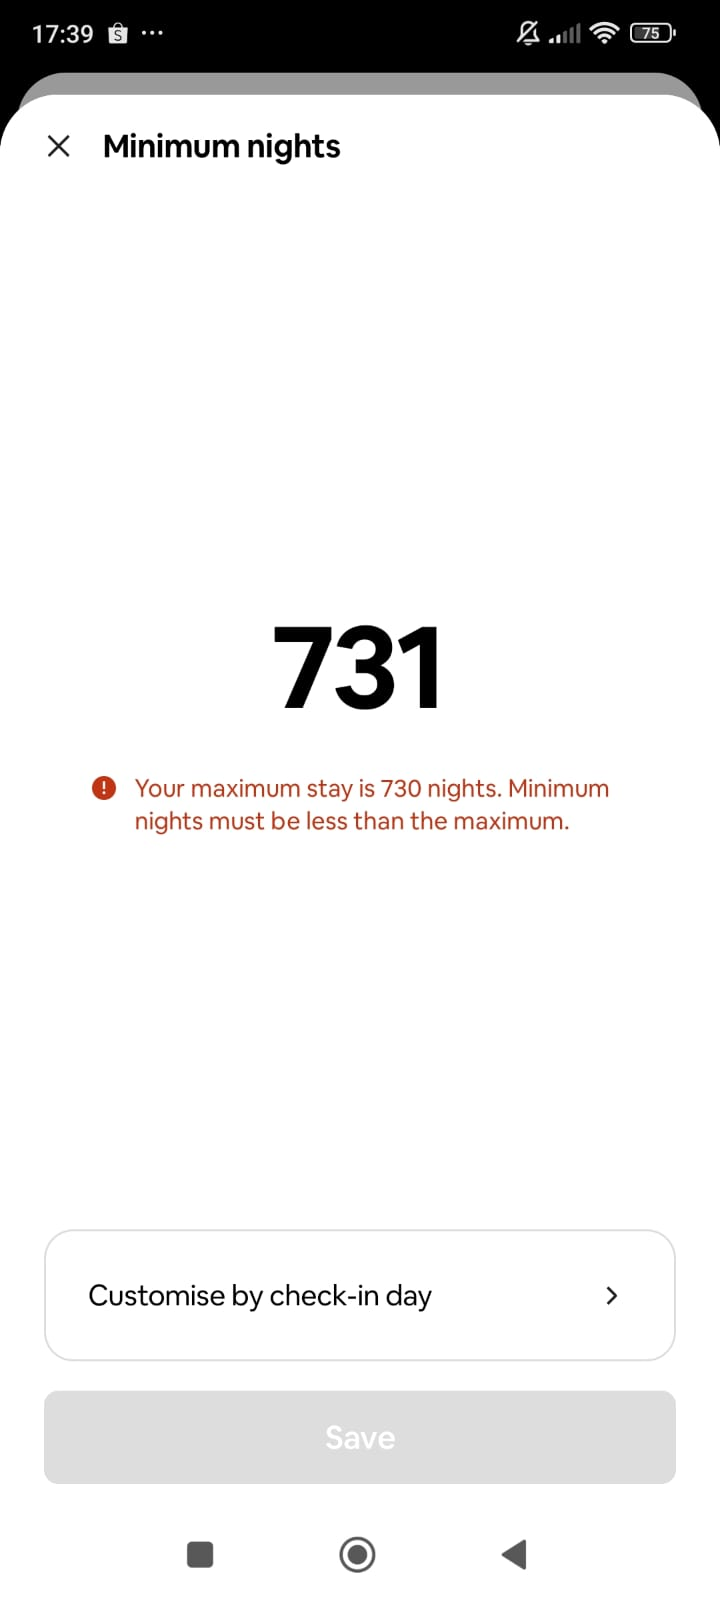
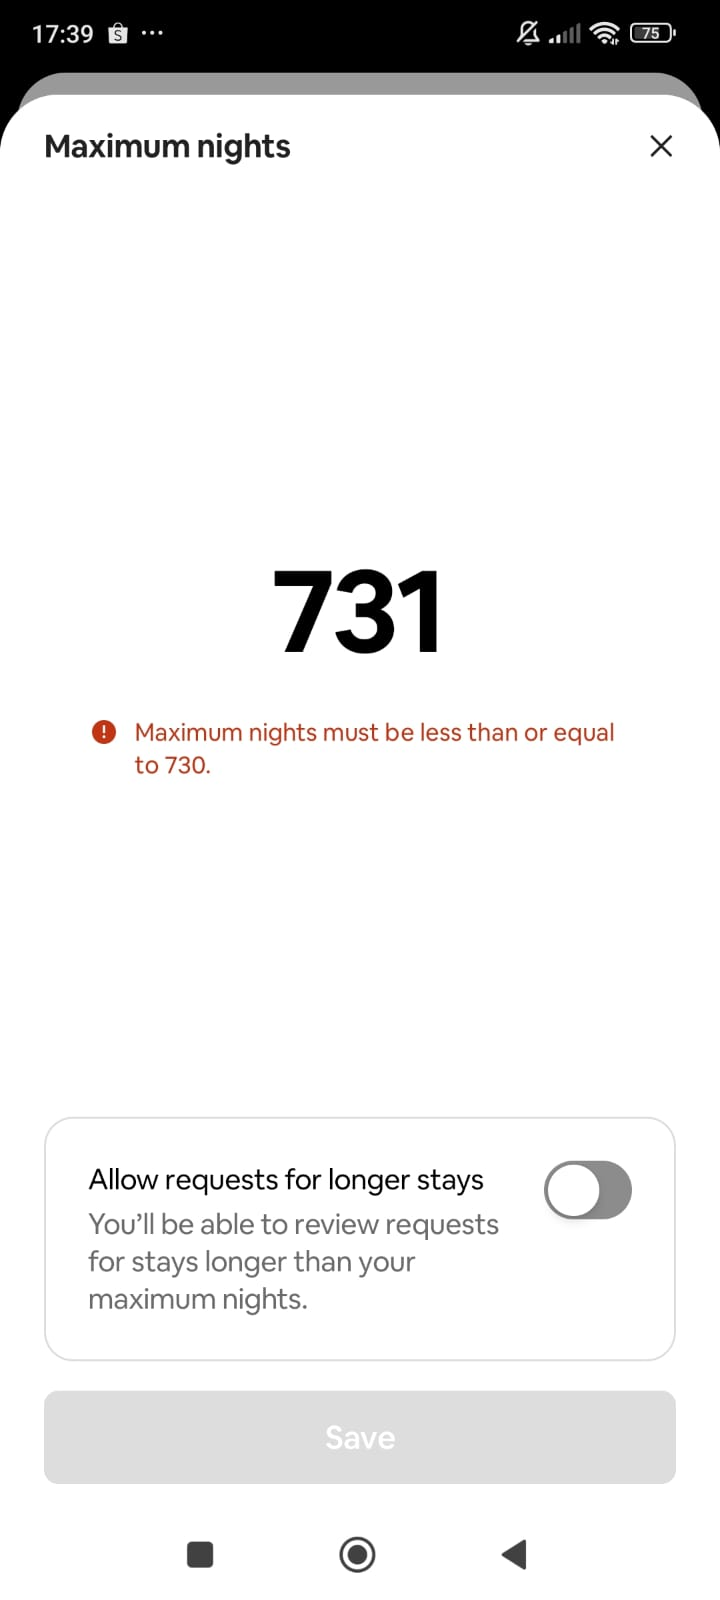

In [58]:
# Menghapus baris dengan minimum_nights lebih dari 730
df = df.drop(df[df["minimum_nights"] > 730].index)
# Proporsi data yang dihapus
print(f"Jumlah Outliers minimum_nights: {df_before[df_before['minimum_nights'] > 730].count()['minimum_nights']}")
print(f"Proporsi Outliers minimum_nights: {df_before[df_before['minimum_nights'] > 730].count()['minimum_nights'] / df_before['minimum_nights'].count()}")
print(f"Jumlah baris minimum_nights sebelum dihapus: {df_before['minimum_nights'].count()}")
print(f"Jumlah baris minimum_nights setelah dihapus: {df['minimum_nights'].count()}")

Jumlah Outliers minimum_nights: 7
Proporsi Outliers minimum_nights: 0.0004415289516841176
Jumlah baris minimum_nights sebelum dihapus: 15854
Jumlah baris minimum_nights setelah dihapus: 15794


### 7. Penilaian Harga (`price`)

Klasifikasi harga dilakukan secara objektif dengan membagi kolom `price` ke dalam empat kelompok berdasarkan distribusi kuartil. Tujuannya adalah untuk mengidentifikasi segmen pasar berdasarkan nilai sewa per malam dengan pendekatan berbasis data, bukan asumsi.

Kriteria segmentasi harga adalah sebagai berikut:

- **Budget**: ฿0 – ฿900.0                    (Q1 atau lebih rendah)
- **Standard**: ฿900.0 – ฿1.421.0             (Q1–Q2 / median)
- **Premium**: ฿1.421.0 – ฿2.417.5            (Q2–Q3)
- **Luxury**: ฿2.417.5 – ฿60.000.0           (Q3 atau lebih tinggi)

Distribusi ini bersifat adaptif terhadap kondisi aktual di lapangan dan dapat digunakan untuk menyusun strategi pemasaran, segmentasi pelanggan, serta penyesuaian harga berdasarkan lokasi, jenis kamar, atau musim.

In [59]:
# Standard Price
q1_price=df["price"].quantile(0.25).round(2)
q2_price=df["price"].quantile(0.5).round(2)
q3_price=df["price"].quantile(0.75).round(2)
q4_price=df["price"].quantile(1).round(2)

print(f"Range harga bugdet  : ฿0-฿{q1_price}")
print(f"Range harga standard: ฿{q1_price}-฿{q2_price}")
print(f"Range harga premium : ฿{q2_price}-฿{q3_price}")
print(f"Range harga luxury  : ฿{q3_price}-฿{q4_price}")

# Membuat kolom price range berdasarkan standard yang telah ditentukan 
df["price_range"] = pd.cut(df["price"], bins=[0, q1_price, q2_price, q3_price, q4_price], labels=["Budget", "Standard", "Premium", "Luxury"])
df[["price", "price_range"]]

Range harga bugdet  : ฿0-฿900.0
Range harga standard: ฿900.0-฿1421.0
Range harga premium : ฿1421.0-฿2415.75
Range harga luxury  : ฿2415.75-฿60000.0


price price_range
0       1905     Premium
1       1316    Standard
2        800      Budget
3       1286    Standard
4       1905     Premium
...      ...         ...
15849   2298     Premium
15850   1429     Premium
15851   1214    Standard
15852   1214    Standard
15853   1214    Standard

[15794 rows x 2 columns]

### 8. Penilaian Ketersediaan (`availability_365`)

Karena tidak terdapat variabel eksplisit yang menunjukkan status pemanfaatan atau frekuensi penyewaan tahunan, maka kolom `availability_365` digunakan sebagai proksi untuk mengukur tingkat ketersediaan properti. Pendekatan ini bersifat **kuantitatif dan objektif**, menggunakan distribusi kuartil sebagai dasar klasifikasi.

Ketersediaan properti dibagi ke dalam tiga kategori:

1. **Rendah** : 0 – 138 hari (Q1 atau lebih rendah)  
2. **Sedang** : 138 – 309 hari (antara Q1 dan Q2)  
3. **Tinggi** : 309 – 365 hari (Q2 atau lebih tinggi)

Klasifikasi ini membantu dalam memahami pola listing aktif, tingkat komitmen host terhadap platform, serta potensi kapasitas pasar di masing-masing segmen.

In [60]:
# Menentukan batas minimum_nights berdasarkan quantile
q1_availability=df["availability_365"].quantile(0.25)
q2_availability=df["availability_365"].quantile(0.5)
q3_availability=df["availability_365"].quantile(1)

print(f"Range ketersediaan rendah   : 0-{q1_availability}")
print(f"Range ketersediaan sedang   : {q1_availability}-{q2_availability}")
print(f"Range ketersediaan tinggi   : {q2_availability}-{q3_availability}")

# Tambahkan kolom minimum_nights_range berdasarkan standard yang telah ditentukan
df["availability_range"] = pd.cut(df["availability_365"], bins=[0, q1_availability, q2_availability, q3_availability], labels=["Rendah", "Sedang", "Tinggi"])
df[["availability_365", "availability_range"]]

Range ketersediaan rendah   : 0-138.0
Range ketersediaan sedang   : 138.0-309.0
Range ketersediaan tinggi   : 309.0-365.0


availability_365 availability_range
0                   353             Tinggi
1                   358             Tinggi
2                   365             Tinggi
3                   323             Tinggi
4                   365             Tinggi
...                 ...                ...
15849               362             Tinggi
15850               365             Tinggi
15851               365             Tinggi
15852               365             Tinggi
15853               365             Tinggi

[15794 rows x 2 columns]

### 9. Penilaian Tingkat Popularitas (`number_of_reviews`)

Karena tidak tersedia kolom eksplisit yang menunjukkan skala rating (seperti skor 0–5), maka jumlah ulasan (`number_of_reviews`) digunakan sebagai proksi untuk mengukur **tingkat popularitas** suatu properti. Pendekatan ini bersifat **kuantitatif dan proporsional**, dengan kategori ditentukan berdasarkan distribusi kuartil (`Q1`, `Q2`, `Q3`) agar pembagian kelas bersifat representatif.

#### Kategori Tingkat Popularitas:
- **Popularitas Rendah** : 0 – 2 review (Q1 – Q2)  
- **Popularitas Sedang** : 2 – 13 review (Q2 – Q3)  
- **Popularitas Tinggi** : 13 – 1224 review (Q3 – Max)

In [61]:
# Menentukan bTingkat popularitas berdasarkan jumlah riview quantile
q1_reviews= df["number_of_reviews"].quantile(0.25)
q2_reviews= df["number_of_reviews"].quantile(0.50)
q3_reviews= df["number_of_reviews"].quantile(0.75)
q4_reviews= df["number_of_reviews"].max()

print(f"Popularitas rendah : {q1_reviews} - {q2_reviews}")
print(f"Popularitas sedang : {q2_reviews} - {q3_reviews}")
print(f"Popularitas tinggi : {q3_reviews} - {q4_reviews}")

# Tambahkan kolom popularitas berdasarkan standard yang telah ditentukan
df["review_status"]= pd.cut(df["number_of_reviews"], bins=[-1, q2_reviews, q3_reviews, q4_reviews], labels=["Rendah", "Sedang", "Tinggi"])
df[["number_of_reviews","review_status"]]

Popularitas rendah : 0.0 - 2.0
Popularitas sedang : 2.0 - 13.0
Popularitas tinggi : 13.0 - 1224


number_of_reviews review_status
0                     65        Tinggi
1                      0        Rendah
2                      0        Rendah
3                      2        Rendah
4                      0        Rendah
...                  ...           ...
15849                  0        Rendah
15850                  0        Rendah
15851                  0        Rendah
15852                  0        Rendah
15853                  0        Rendah

[15794 rows x 2 columns]

## Convert to csv
Konversi dataset Airbnb properti wilayah Bangkok yang telah melalui proses pembersihan ke dalam file berformat .csv untuk keperluan dokumentasi atau analisis lanjutan.

In [62]:
# Perbaikan urutan kolom
df = df[[
    "id", "name", "host_id", "host_name", "neighbourhood",
    "latitude", "longitude", "room_type", "price","price_range",
    "minimum_nights", "number_of_reviews", "review_status","last_review",
    "reviews_per_month", "last_review_status","last_review_status_int",
    "calculated_host_listings_count", "availability_365","availability_range"
    ,"number_of_reviews_ltm",
]]

df.to_csv("Airbnb propertis Bangkok New.csv", index=False)
df.head()

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

  price_range  ...  number_of_reviews  review_status last_review  \
0     Premium  ...                 65         Tinggi  2020-01-06   
1    Standard  ...                  0         Rendah         NaT   
2      Budget  ...                  0         Rendah         NaT   
3    Standard  ...                  2         Rendah  2022-04-01   
4     Premium  ...                  0         Rendah         NaT   

  reviews_per_month  last_review_status last_review_status_int  \
0              0.50          Ada Review                      1   
1               NaN    Tidak Ada Review                      0   
2               NaN    Tidak Ada Review                      0   
3              0.03          Ada Review                      1   
4               NaN    Tidak Ada Review                      0   

   calculated_host_listings_count  availability_365  availability_range  \
0                               2               353              Tinggi   
1                               2               358              Tinggi   
2                               1               365              Tinggi   
3                               1               323              Tinggi   
4                               3               365              Tinggi   

  number_of_reviews_ltm  
0                     0  
1                     0  
2                     0  
3                     1  
4                     0  

[5 rows x 21 columns]

Berikut adalah Keterangan kolom beserta data yang sudah dimodifikasi:
### Keterangan Kolom Dataset

| Kolom                          | Deskripsi                                                                                  |
|-------------------------------|---------------------------------------------------------------------------------------------|
| **id**                        | ID unik dari setiap listing properti yang tersedia di platform.                            |
| **name**                      | Nama atau judul listing yang ditampilkan kepada calon penyewa.                            |
| **host_id**                   | ID unik dari host (pemilik properti) yang mendaftarkan listing.                           |
| **host_name**                 | Nama depan host atau pemilik yang terdaftar di platform.                                   |
| **neighbourhood**            | Nama distrik atau wilayah administratif tempat properti berada.                            |
| **latitude**                  | Koordinat geografis lintang dari lokasi properti.                                          |
| **longitude**                 | Koordinat geografis bujur dari lokasi properti.                                            |
| **room_type**                 | Jenis akomodasi yang ditawarkan (contoh: Entire home/apt, Private room, dll).              |
| **price**                     | Harga sewa properti per malam dalam satuan Baht Thailand (THB).                           |
| **price_range**              | Kategori harga berdasarkan segmentasi: Budget, Standard, Premium, atau Luxury.             |
| **number_of_reviews**        | Jumlah total ulasan yang diterima listing tersebut sejak pertama kali tayang.              |
| **review_status**            | Klasifikasi status keterlibatan berdasarkan banyaknya ulasan (Rendah/Sedang/Tinggi).        |
| **last_review**              | Tanggal ulasan terakhir yang diterima oleh listing.                                        |
| **reviews_per_month**        | Rata-rata jumlah ulasan per bulan selama listing aktif.                                    |
| **last_review_status**       | Status keberadaan ulasan dalam 12 bulan terakhir (Ada Review / Tidak Ada Review).         |
| **last_review_status_int**   | Representasi numerik dari `last_review_status` (1 jika ada review, 0 jika tidak).           |
| **calculated_host_listings_count** | Jumlah properti lain yang dimiliki oleh host terkait di platform.                    |
| **availability_365**         | Jumlah hari dalam setahun properti tersedia untuk disewa (maksimal 365).                   |
| **availability_range**       | Kategori ketersediaan properti (contoh: Tinggi, Sedang, Rendah).                           |
| **number_of_reviews_ltm**    | Jumlah ulasan yang diterima dalam 12 bulan terakhir (LTM = Last Twelve Months).            |


## Data Analisis

### Analisa berdasarkan room type

#### 1. Tipe kamar mana yang menunjukkan tingkat keterlibatan dan kepuasan tertinggi berdasarkan volume review dan jumlah reviewer?

In [63]:
# Cek normalitas dari number_of_review
df_review = df["number_of_reviews"].dropna()
premium = (df_review - df_review.mean()) / df_review.std()
stat, p_value = kstest(premium,"norm")
if p_value<0.05:
    print(f"p_value={p_value:.4f}, Datanya berdisirtibusi tidak normal")
else:
    print(f"p_value={p_value:.4f}, Datanya berdisirtibusi normal")

#Histogram
df_histo_riview=px.histogram(
    df_review,          
    x="number_of_reviews",                       
    title="Distribusi reviewer",          
    labels={"number_of_reviews": "reviewer"}) 

df_histo_riview.update_layout(title_x=0.5,
    title_xanchor="center")

df_histo_riview.show()

p_value=0.0000, Datanya berdisirtibusi tidak normal


Kolom jumlah riview memiliki ciri-ciri data bersifat abnormal dan right skewed.

In [64]:
# Tabel Groupby
df_reviewer=df[df["last_review_status_int"] == 1]

df_groupby= df_reviewer.groupby("room_type").agg(
    Total_review=("number_of_reviews", "sum")).round(2).reset_index()

# Barplot
bar_groupby=px.bar(df_groupby,
                x="room_type",
                y="Total_review",
                title="Tinggi Minat Pelanggan Berdasarkan jumlah reviewer",
                labels={"room_type": "Jenis Kamar", "Total_review": "Total Review"},
                text_auto=True,
                color="room_type")

bar_groupby.update_layout(title_x=0.5,
    title_xanchor="center")
    
bar_groupby.show()
display(df_groupby)

room_type  Total_review
0  Entire home/apt        197249
1       Hotel room         12698
2     Private room         50609
3      Shared room          2682

##### Insight 
Tipe akomodasi **"Entire home/apt" secara jelas menunjukkan tingkat keterlibatan dan kepuasan tertinggi** dibandingkan tipe lainnya, dengan mencatat **197.249 review**. Jumlah ini merepresentasikan mayoritas kontribusi review dalam keseluruhan platform, menandakan bahwa pengguna tidak hanya lebih sering menyewa tipe ini, tetapi juga lebih terdorong untuk memberikan umpan balik. Hal ini mengindikasikan **tingkat kepuasan yang tinggi**, karena volume review yang besar biasanya merupakan cerminan dari pengalaman pengguna yang signifikan, baik secara positif maupun negatif, dengan kecenderungan positif pada volume sebesar ini.

Di posisi kedua, **"Private room" mencatat 50.609 review**, memperlihatkan bahwa meskipun unitnya tidak sepopuler hunian penuh, **minat dan keterlibatan pengguna tetap substansial**. Hal ini menunjukkan bahwa ada segmen pasar yang cukup aktif menggunakan opsi ini — biasanya wisatawan individu atau mereka yang mencari solusi ekonomis dengan tetap mempertahankan elemen privasi. Tingginya volume review ini menjadi sinyal bahwa **private room memiliki nilai pasar yang kompetitif**, terutama jika ditawarkan dengan kualitas layanan dan fasilitas yang memadai.

Sebaliknya, **"Hotel room" dan "Shared room" menunjukkan tingkat keterlibatan yang relatif rendah**, masing-masing dengan **12.698** dan **2.682 review**. Rendahnya volume review pada tipe ini mengindikasikan bahwa keduanya memiliki daya tarik terbatas bagi mayoritas pengguna. Untuk **"Hotel room"**, hal ini bisa terjadi karena pengguna lebih memilih pengalaman lokal atau suasana rumahan daripada layanan hotel standar. Sementara itu, **"Shared room"** cenderung mengalami keterbatasan permintaan karena kompromi pada privasi. **Implikasinya**, strategi pengelolaan inventori dan promosi sebaiknya memprioritaskan tipe-tipe yang terbukti memiliki tingkat review tinggi, sementara segmen dengan keterlibatan rendah memerlukan pendekatan khusus atau reposisi nilai.

#### 2. Jenis kamar mana yang menunjukkan tingkat okupansi tertinggi berdasarkan intensitas review bulanan, dan apa implikasinya terhadap strategi penyewaan?

In [65]:
# Cek normalitas dari review_per_month
df_review = df["reviews_per_month"].dropna()
standard = (df_review - df_review.mean()) / df_review.std()
stat, p_value = kstest(standard,"norm")
if p_value<0.05:
    print(f"p_value={p_value:.4f}, Datanya berdistribusi tidak normal")
else:
    print(f"p_value={p_value:.4f}, Datanya berdistribusi normal")

#Histogram
df_histo_month=px.histogram(
    df_review,          # DataFrame (wajib)
    x="reviews_per_month",                       
    title="Distribusi review per Bulan",          
    labels={"reviews_per_month": "review per Bulan"} 
)

df_histo_month.update_layout(title_x=0.5,
    title_xanchor="center")

p_value=0.0000, Datanya berdistribusi tidak normal


Kolom riview per bulan juga memiliki ciri-ciri data bersifat tidak normal dan distribusi right skewed

In [66]:
# Uji Analisa Kruskal Wallis antara room type dengan review per month
df_apt=df.loc[df["room_type"]=="Entire home/apt","reviews_per_month"].dropna()
df_hotel=df.loc[df["room_type"]=="Hotel room","reviews_per_month"].dropna()
df_private=df.loc[df["room_type"]=="Private room","reviews_per_month"].dropna()
df_shared=df.loc[df["room_type"]=="Shared room","reviews_per_month"].dropna()

stat, p_value = kruskal(df_apt,df_hotel,df_private,df_shared)
if p_value<0.05:
    print(f"p_value={p_value:.4f}, Terdapat perbedaan antara jenis kamar dan review per bulan")
else:
    print(f"p_value={p_value:.4f}, Tidak terdapat perbedaan antara jenis kamar dan review per bulan")

# Barplot 
df_review=df.loc[:, ["room_type", "reviews_per_month", "last_review_status_int"]].dropna()
df_groupby = df_review.groupby("room_type").agg(
    Jumlah_review=("reviews_per_month", "count"),
    Rata_Rata_review_Per_Bulan=("reviews_per_month", "mean")
).round(2).reset_index()

bar_groupby = px.bar(
    df_groupby,
    x="room_type",
    y="Rata_Rata_review_Per_Bulan",
    color="room_type",
    text_auto=True,
    title="Rata-Rata Frekuensi Review Bulanan per Jenis Kamar",
    labels={"room_type": "Jenis Kamar", "Rata_Rata_review_Per_Bulan": "Rata-Rata review Per Bulan"}
)

bar_groupby.update_layout(title_x=0.5,
    title_xanchor="center")
    
bar_groupby.show()

p_value=0.0000, Terdapat perbedaan antara jenis kamar dan review per bulan


In [67]:
df_review=df.loc[:, ["room_type", "reviews_per_month", "last_review_status_int"]].dropna()
df_groupby = df_review.groupby("room_type").agg(
    Jumlah_review=("reviews_per_month", "count"),
    Rata_Rata_review_Per_Bulan=("reviews_per_month", "mean")
).round(2).reset_index()
bar_group_total= px.bar(
    df_groupby,
    x="room_type",
    y='Jumlah_review',
    color="room_type",
    text_auto=True,
    title="Jumlah Unit Akomodasi yang Menerima Review Bulanan per Jenis Kamar",
    labels={"room_type": "Jenis Kamar", "Jumlah_review": "Jumlah Reviewer"}
)

bar_group_total.update_layout(title_x=0.5,
    title_xanchor="center")
    
bar_group_total.show()
display(df_groupby)

room_type  Jumlah_review  Rata_Rata_review_Per_Bulan
0  Entire home/apt           6549                        0.96
1       Hotel room            449                        0.46
2     Private room           2828                        0.58
3      Shared room            205                        0.28

##### Insight
Tipe akomodasi **"Entire home/apt" mencatat tingkat okupansi tertinggi** dengan **rata-rata 0,96 review per bulan per unit**, yang secara signifikan mengungguli tipe lainnya. Angka ini menandakan tingkat hunian yang tinggi dan konsisten, serta menunjukkan bahwa unit hunian penuh tetap menjadi pilihan utama wisatawan. Tingginya intensitas review mengimplikasikan bahwa pengguna tidak hanya sering menyewa tipe ini, tetapi juga cukup puas hingga terdorong untuk memberikan review. Hal ini memperkuat posisi **"Entire home/apt"** sebagai **segmen unggulan** yang layak untuk diprioritaskan dalam **strategi penyewaan dan ekspansi**.

Di sisi lain, **"Private room" menempati posisi kedua dengan rata-rata 0,58 review per bulan**, mengungguli **"Hotel room" (0,46)** meskipun dari sisi persepsi awal, hotel room umumnya dianggap lebih komersial. Ini menunjukkan bahwa segmen pengguna tertentu masih melihat **nilai dan kenyamanan** dalam menyewa ruang pribadi di lingkungan domestik. Implikasinya, penyedia properti perlu mempertimbangkan **penambahan unit private room**, khususnya di lokasi dengan permintaan tinggi, karena masih ada ruang untuk meningkatkan pendapatan dari segmen ini dengan **biaya investasi yang relatif rendah** dibandingkan entire unit.

Sebaliknya, **"Shared room" menunjukkan okupansi terendah**, dengan hanya **0,28 review per bulan per unit**, yang dapat diartikan sebagai **rendahnya permintaan** atau **kurangnya minat dari pasar** terhadap tipe ini. Strategi penyewaan untuk tipe shared room sebaiknya difokuskan pada **reposisi nilai** — misalnya dengan menyasar wisatawan berkelompok, pelancong jangka panjang, atau program komunitas. Namun, jika minat tetap rendah, pendekatan optimal adalah **mengalihkan properti tipe ini menjadi private room atau entire unit**, guna meningkatkan utilisasi dan potensi pendapatan.

#### 3. Apakah terdapat mismatch antara ketersediaan dan minat pasar terhadap jenis kamar tertentu, dan bagaimana implikasinya terhadap strategi penawaran unit?

1. Apakah terdapat hubungan signifikan dalam tingkat ketersediaan(availability_365) di antara berbagai jenis kamar?
    
    Terdapat Hubungan signifikan antara jenis kamar dan ketersediaan kamar




In [68]:
# Uji Analisa Kruskal Wallis antara room type dengan availability 365
df_apt=df.loc[df["room_type"]=="Entire home/apt","availability_365"].dropna()
df_hotel=df.loc[df["room_type"]=="Hotel room","availability_365"].dropna()
df_private=df.loc[df["room_type"]=="Private room","availability_365"].dropna()
df_shared=df.loc[df["room_type"]=="Shared room","availability_365"].dropna()

stat, p_value = kruskal(df_apt,df_hotel,df_private,df_shared)
if p_value<0.05:
    print("Terdapat Hubungan signifikan antara jenis kamar dan ketersediaan kamar")
else:
    print("Tidak terdapat Hubungan signifikan antara jenis kamar dan ketersediaan kamar") 

Terdapat Hubungan signifikan antara jenis kamar dan ketersediaan kamar


2. Tentukan standard untuk tipe kamar yang memiliki tingkat ketersediaan yang rendah dan tingkat ketersidaan yang tinggi

In [69]:
# Menentukan tingkat ketersediaan kamar berdasarkan quantile
kamar_tersedia_rendah=df[df["availability_365"]<=q1_availability]
kamar_rating_tinggi=df[df["number_of_reviews"]>=q3_reviews]
kamar_soal=df[(df["number_of_reviews"]>=q3_reviews)& (df["availability_365"]<=q1_availability)& (df["last_review_status_int"]==1)]

print(f"Jumlah kamar yang tersedia rendah: {len(kamar_tersedia_rendah)}")
print(f"Jumlah kamar yang rating tinggi: {len(kamar_rating_tinggi)}")
print(f"Jumlah kamar yang memenuhi kriteria soal: {len(kamar_soal)}")

Jumlah kamar yang tersedia rendah: 3966
Jumlah kamar yang rating tinggi: 4091
Jumlah kamar yang memenuhi kriteria soal: 1311


3. Cari insight dari setiap jenis kamar yang ketersedianya rendah tetapi ratingnya tinggi

In [70]:
# Pie Chart
df_groupby = kamar_soal.groupby("room_type").agg(
    Jumlah_kamar=("availability_365", "count"),
).round(2).reset_index()
df_groupby["Persentase_Ketersediaan"] = (df_groupby["Jumlah_kamar"] / df_groupby["Jumlah_kamar"].sum() * 100).round(2)

pie_groupby=px.pie(
    df_groupby,
    values="Jumlah_kamar",
    names="room_type",
    title="Persentase Ketersediaan per Jenis Kamar Dengan Review Tinggi"
)

pie_groupby.update_layout(title_x=0.5,
    title_xanchor="center")

pie_groupby.show()
display(df_groupby)

room_type  Jumlah_kamar  Persentase_Ketersediaan
0  Entire home/apt          1082                    82.53
1       Hotel room            41                     3.13
2     Private room           187                    14.26
3      Shared room             1                     0.08

##### Insight
Tipe akomodasi **"Entire home/apt" menunjukkan dominasi absolut** dalam hal ketersediaan, dengan menyediakan **1.082 unit atau 82,53% dari total pasokan**. Data ini konsisten dengan tingginya minat pasar dan volume review yang sebelumnya dicatat pada tipe ini, mengindikasikan bahwa **strategi penawaran telah selaras dengan preferensi mayoritas pengguna**. Ketersediaan yang tinggi pada segmen ini mencerminkan **respons pasar yang tepat terhadap permintaan** yang mengutamakan privasi dan kenyamanan penuh dalam hunian sementara.

Sebaliknya, tipe **"Private room" hanya berkontribusi 14,26% dari total ketersediaan**, meskipun sebelumnya menunjukkan **keterlibatan pengguna yang cukup signifikan** dari sisi jumlah reviewer dan volume review. Ini mengindikasikan adanya potensi **kesenjangan antara permintaan dan pasokan** pada segmen ini. Bila tidak direspons secara adaptif, **kekurangan pasokan private room berisiko menciptakan backlog permintaan**, serta menghambat potensi konversi dari segmen wisatawan dengan anggaran menengah yang masih mencari kenyamanan dan privasi.

Sementara itu, tipe **"Hotel room" dan "Shared room" menunjukkan kontribusi ketersediaan yang sangat rendah**, masing-masing hanya **3,13% dan 0,08%**. Rendahnya ketersediaan ini sejalan dengan minimnya minat pasar yang tercermin dari volume review dan jumlah reviewer sebelumnya. Hal ini menunjukkan bahwa **kedua segmen tersebut memiliki posisi pasar yang terbatas**, dan dalam konteks strategi penawaran unit, pengembang sebaiknya **mengalokasikan sumber daya secara selektif** ke segmen ini hanya jika ada bukti peningkatan minat spesifik (misalnya event lokal, wisata grup, atau keperluan jangka pendek tertentu).

#### 4. Jenis kamar mana yang tetap diminati pelanggan dalam 12 bulan terakhir, dan bagaimana perubahan pola permintaan tercermin dari review terbaru?

1. Mencari jumlah kamar yang memiliki Review

In [71]:
df_analisis_1 = df[df["last_review_status"]=="Ada Review"].loc[:, ["room_type", "number_of_reviews_ltm", "last_review_status"]]
print(f"Jumlah kamar yang memiliki riview: {len(df_analisis_1)}")
df_analisis_1.sort_values(by="number_of_reviews_ltm", ascending=False).head()

Jumlah kamar yang memiliki riview: 10031


room_type  number_of_reviews_ltm last_review_status
5759   Entire home/apt                    325         Ada Review
375    Entire home/apt                    277         Ada Review
11732     Private room                    246         Ada Review
3562        Hotel room                    147         Ada Review
6586      Private room                    146         Ada Review

2. Mencari Jumlah kamar yang memiliki riview dalam 12 bulan terakhir

In [72]:
df_analisis_2=df[(df["last_review_status"]=="Ada Review")& (df["number_of_reviews_ltm"]>0)].loc[:, ["room_type", "number_of_reviews_ltm", "last_review_status"]]
print(f"Jumlah kamar yang mendapat riview dalam 12 bulan terakhir: {len(df_analisis_2)}")
Proporsi = (len(df_analisis_2) / len(df_analisis_1) * 100)
print(f"Proporsi kamar yang mendapat riview dalam 12 bulan terakhir: {Proporsi:.2f}%")
df_analisis_2.sort_values(by="number_of_reviews_ltm", ascending=False).head()

Jumlah kamar yang mendapat riview dalam 12 bulan terakhir: 6631
Proporsi kamar yang mendapat riview dalam 12 bulan terakhir: 66.11%


room_type  number_of_reviews_ltm last_review_status
5759   Entire home/apt                    325         Ada Review
375    Entire home/apt                    277         Ada Review
11732     Private room                    246         Ada Review
3562        Hotel room                    147         Ada Review
6586      Private room                    146         Ada Review

Terdapat 33.9% kamar yang tidak memiliki review dalam 12 bulan terakhir

3. Menggabungkan kamar yang memiliki tidak memiliki dan memiliki riview dalam 12 bulan terakhir 

In [73]:
df_groupby1=df_analisis_1.groupby("room_type").agg(
    Jumlah_kamar=("number_of_reviews_ltm", "count"),
).rename(columns={"Jumlah_kamar": "Total Riview"}).round(2).reset_index()

df_groupby2=df_analisis_2.groupby("room_type").agg(
    Jumlah_kamar=("number_of_reviews_ltm", "count"),
).rename(columns={"Jumlah_kamar": "Riview Tahunan"}).round(2).reset_index()

df_groupby3=pd.merge(df_groupby1, df_groupby2, on="room_type")

df_groupby3

room_type  Total Riview  Riview Tahunan
0  Entire home/apt          6549            4882
1       Hotel room           449             192
2     Private room          2828            1482
3      Shared room           205              75

Kamar tipe entire home/apt paling konsisten mendapatkan review dalam 12 bulan terakhir, dengan tingkat konsistensi tertinggi sebesar 74,53%.

Membuat stacked bar chart untuk melihat perbedaan kamar dengan riview konsisten dan kamar yang hanya memiliki riview per jenis kamar

In [74]:
# Menggabungkan dua dataframe sebagai satu dataframe melted untuk visualisasi
df_melted = df_groupby3.melt(
    id_vars="room_type",
    value_vars=["Total Riview", "Riview Tahunan"],
    var_name="Tipe Kamar",
    value_name="Jumlah"
)

# Stacked Bar chart
bar_melted = px.bar(
    df_melted,
    y="room_type",
    x="Jumlah",
    color="Tipe Kamar",
    text_auto=True,
    orientation="h",                 # Horizontal bar
    barmode="group",                 
    title="Total Review vs Review Tahunan",
    labels={"room_type": "Jenis Kamar", "Jumlah": "Jumlah Kamar"}
)

category_order = ["Total Riview", "Riview Tahunan"]

bar_melted.update_layout(title_x=0.5,
    title_xanchor="center")

bar_melted.show()
display(df_melted)

room_type      Tipe Kamar  Jumlah
0  Entire home/apt    Total Riview    6549
1       Hotel room    Total Riview     449
2     Private room    Total Riview    2828
3      Shared room    Total Riview     205
4  Entire home/apt  Riview Tahunan    4882
5       Hotel room  Riview Tahunan     192
6     Private room  Riview Tahunan    1482
7      Shared room  Riview Tahunan      75

4. Uji analisis untuk melihat apakah Proporsi kamar dengan review konsisten berbeda antar jenis kamar

In [75]:
# Menguji apakah proporsi kamar dengan review konsisten berbeda secara signifikan antar jenis kamar.

H0="Proporsi kamar dengan review konsisten sama antar jenis kamar"
H1="Proporsi kamar dengan review konsisten berbeda antar jenis kamar"

df["consistent_review"] = (df["number_of_reviews_ltm"] > 0).astype(int)
chi_test = pd.crosstab(df["room_type"], df["consistent_review"])
stats, p_value, dof, expected = chi2_contingency(chi_test)

if p_value<0.05:
    print(f"p_value={p_value:.4f}, {H1}")
else:
    print(f"p_value={p_value:.4f}, {H0}")

p_value=0.0000, Proporsi kamar dengan review konsisten berbeda antar jenis kamar


##### Insight

Tipe akomodasi **"Entire home/apt" tetap menjadi pilihan utama pelanggan dalam 12 bulan terakhir**, dengan **4.882 unit tercatat menerima review baru**, atau setara dengan **74,55% dari total unit yang pernah menerima review**. Angka ini menunjukkan bahwa permintaan terhadap hunian penuh tidak hanya tinggi di masa lalu, tetapi juga **terjaga secara konsisten dalam periode terbaru**. Kinerja ini mencerminkan **preferensi berkelanjutan terhadap privasi dan kenyamanan** yang ditawarkan oleh tipe akomodasi ini, menjadikannya **segmen yang stabil dan layak diprioritaskan** dalam strategi jangka panjang.

Sementara itu, tipe **"Private room" menunjukkan tingkat keberlanjutan permintaan yang moderat**, dengan **52,40% unit** masih menerima review dalam 12 bulan terakhir. Hal ini menunjukkan bahwa **sebagian besar pengguna tetap mempertimbangkan opsi yang lebih ekonomis**, meskipun tidak sekuat tren pada hunian penuh. Segmen ini tetap relevan, khususnya di pasar dengan keterbatasan daya beli atau kebutuhan fleksibilitas biaya, dan dapat diperkuat melalui **peningkatan mutu layanan** atau **diferensiasi produk** seperti fasilitas eksklusif dalam ruang privat.

Di sisi lain, **"Hotel room" dan "Shared room" mencatat persentase keberlanjutan permintaan yang lebih rendah**, masing-masing hanya **42,76% dan 36,59%**. Hal ini mengindikasikan bahwa **dua segmen ini mengalami penurunan keterlibatan dalam periode terbaru**, yang mungkin disebabkan oleh **perubahan preferensi pasca-pandemi**, **meningkatnya ekspektasi privasi**, atau **kompetisi dari tipe akomodasi lain** yang lebih fleksibel. Implikasinya, pemilik atau penyedia layanan perlu **mengevaluasi ulang model penawaran** pada tipe kamar ini, dengan fokus pada adaptasi terhadap permintaan aktual atau mempertimbangkan **konversi ke format yang lebih diminati**.

### Analisa Berdasarkan Price

#### 5. Bagaimana distribusi tipe kamar pada setiap segmen harga, dan segmen mana yang paling banyak diisi oleh pelanggan?

1. Menentukan standard Harga

In [76]:
# Bar plot distribusi harga
df_pie = df["price_range"].value_counts().reset_index()
df_pie.columns = ["price_range", "jumlah"]
df_pie["Persentase"]= (df_pie["jumlah"] / df_pie["jumlah"].sum() * 100).round(2)
bar_price=px.bar(df_pie, 
        x="price_range", 
        y="jumlah",
        color="Persentase", 
        text="Persentase", 
        title="Distribusi Harga per Jenis Kamar(%)")

bar_price.update_layout(title_x=0.5)

bar_price.show()
display(df_pie)

price_range  jumlah  Persentase
0      Budget    4100       25.96
1      Luxury    3949       25.00
2     Premium    3944       24.97
3    Standard    3801       24.07

Distribusi unit akomodasi berdasarkan rentang harga menunjukkan pola yang relatif seimbang antarsegmen, dengan keempat kategori — Budget, Luxury, Premium, dan Standard — masing-masing menyumbang proporsi yang hampir setara terhadap total inventori. Segmen Budget sedikit mendominasi dengan 25,96%, diikuti sangat dekat oleh Luxury (25,00%), Premium (24,97%), dan Standard (24,07%). Pola ini mencerminkan bahwa penyedia properti telah berupaya menyediakan penawaran yang merata untuk menjangkau berbagai lapisan konsumen, dari wisatawan beranggaran rendah hingga pencari kenyamanan premium.

2. Cek proporsi data dengan chi square test

In [77]:
# Chi Square Test
# Menguji apakah proporsi kamar dengan review konsisten berbeda secara signifikan antar jenis kamar.

H0="Proporsi kamar dengan review konsisten sama antar jenis kamar"
H1="Proporsi kamar dengan review konsisten berbeda antar jenis kamar"

df["consistent_review"] = (df["number_of_reviews_ltm"] > 0).astype(int)
chi_test = pd.crosstab(df["room_type"], df["consistent_review"])
stats, p_value, dof, expected = chi2_contingency(chi_test)

if p_value<0.05:
    print(f"p_value={p_value:.4f}, {H1}")
else:
    print(f"p_value={p_value:.4f}, {H0}")

p_value=0.0000, Proporsi kamar dengan review konsisten berbeda antar jenis kamar


Harga sewa kamar dengan kategori Budget menjadi pilihan paling umum oleh pelanggan (26%), namun perbedaan proporsi antar semua kategori harga sangat kecil. Artinya, peminat tersebar merata di semua segmen, termasuk Premium dan Luxury.

3. Bagaimana hubungan antara harga dengan jumlah review yang diterima dalam setiap jenis kamar?

In [78]:
# sunburst antara harga, jenis kamar, dan jumlah riview

df_melted = df.pivot_table(
    index=["price_range", "room_type"],
    values="number_of_reviews",
    aggfunc="count",
    fill_value=0
).reset_index()

df_melted.columns = ["price_range", "room_type", "jumlah"]

df_melted["Persentase"] = (df_melted["jumlah"] / df_melted["jumlah"].sum() * 100).round(2)

sunburst = px.sunburst(
    df_melted,
    path=["price_range", "room_type"],
    hover_data={"Persentase": True},
    values="jumlah",
    title="Distribusi Harga per Jenis Kamar",
)

sunburst.update_traces(textinfo="label+percent entry") 
sunburst.update_layout(title_x=0.5)

sunburst.show()
display(df_melted)

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\1521223507.py:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



price_range        room_type  jumlah  Persentase
0       Budget  Entire home/apt    1622       10.27
1       Budget       Hotel room     140        0.89
2       Budget     Private room    1896       12.00
3       Budget      Shared room     442        2.80
4     Standard  Entire home/apt    2232       14.13
5     Standard       Hotel room     131        0.83
6     Standard     Private room    1401        8.87
7     Standard      Shared room      37        0.23
8      Premium  Entire home/apt    2545       16.11
9      Premium       Hotel room     161        1.02
10     Premium     Private room    1220        7.72
11     Premium      Shared room      18        0.11
12      Luxury  Entire home/apt    2482       15.71
13      Luxury       Hotel room     215        1.36
14      Luxury     Private room    1226        7.76
15      Luxury      Shared room      26        0.16

##### Insight
Distribusi tipe kamar pada setiap segmen harga menunjukkan bahwa **"Entire home/apt" mendominasi di semua kategori harga**, khususnya pada segmen **Premium (16,11%)** dan **Luxury (15,71%)**. Hal ini mencerminkan kecenderungan konsumen yang bersedia membayar lebih untuk mendapatkan **privasi dan kenyamanan penuh**. Dominasi ini juga terlihat di segmen **Budget** dan **Standard**, menandakan bahwa **hunian penuh tetap menjadi pilihan utama lintas kategori harga**. Dengan demikian, **strategi pengembangan unit dengan tipe Entire home/apt tetap relevan di semua rentang harga**, dari segmen rendah hingga premium.

Tipe **"Private room" juga memiliki kehadiran yang signifikan**, terutama pada segmen **Budget (12,00%)**, menunjukkan bahwa tipe ini sangat diminati oleh pelanggan yang menginginkan **keseimbangan antara harga dan privasi**. Meskipun kontribusinya menurun pada segmen harga yang lebih tinggi, permintaan terhadap private room tetap terlihat di segmen **Luxury dan Premium**, yang menunjukkan bahwa ada **pangsa pasar yang menghargai efisiensi biaya tanpa sepenuhnya mengorbankan kenyamanan**. Oleh karena itu, **penawaran private room dapat terus dipertahankan**, terutama di kawasan dengan kepadatan tinggi atau destinasi backpacker.

Sebaliknya, **tipe "Shared room" dan "Hotel room" menunjukkan kontribusi yang sangat rendah di seluruh segmen harga**, dengan persentase terbesar hanya **2,80% (Shared room di Budget)** dan **1,36% (Hotel room di Luxury)**. Rendahnya permintaan ini mengindikasikan bahwa konsumen cenderung menghindari opsi yang melibatkan **kompromi privasi**, bahkan dalam kategori harga rendah. Implikasinya, penyedia akomodasi perlu **mengevaluasi kelayakan mempertahankan tipe ini dalam inventori**, atau mempertimbangkan untuk **mengonversinya menjadi tipe private atau entire home** guna meningkatkan tingkat hunian dan daya saing.

#### 6. Bagaimana strategi distribusi harga dan jenis kamar bervariasi antar lokasi, dan kawasan mana yang paling adaptif dalam melayani semua segmen pasar?

1. Apakah lingkungan tetangga menentukan jenis kamar yang disewa? 

In [79]:
# Uji statisitik neighbourhood dengan room type 
chi_test = pd.crosstab(df["neighbourhood"], df["room_type"])
stats, p_value, dof, expected = chi2_contingency(chi_test)

if p_value < 0.05:
    print(f"p-value = {p_value:.4f} → Terdapat hubungan signifikan antara neighbourhood dan jenis kamar")
else:
    print(f"p-value = {p_value:.4f} → Tidak ada hubungan signifikan antara neighbourhood dan jenis kamar")

# Grouped Bar Chart: Top 10 Neighbourhood + Room Type
# Mengelompokkan data berdasarkan neighbourhood dan room_type, lalu menghitung jumlah unit
df_group_neighbourhood= df.groupby(["neighbourhood", "room_type"]).size().reset_index(name='count')
df_top_neighbourhood = (
    df_group_neighbourhood
    .groupby("neighbourhood")["count"].sum().nlargest(5).index)

# Memfilter dataframe untuk hanya menyertakan neighbourhood yang ada di top 10
df_top_neighbourhood = df_group_neighbourhood[df_group_neighbourhood["neighbourhood"].isin(df_top_neighbourhood)]
df_top_neighbourhood = df_top_neighbourhood.sort_values(by=["neighbourhood", "count"], ascending=False)

# Membuat bar chart dengan Plotly Express
bar_neighbourhood = px.bar(
    df_top_neighbourhood,
    x="neighbourhood",
    y="count",
    color="room_type",
    text="count",
    title="Top 5 Jenis Kamar dan Lokasi",
    labels={"neighbourhood": "Neighbourhood", "count": "Jumlah Distrik"},
    barmode="group")

bar_neighbourhood.update_layout(title_x=0.5)
bar_neighbourhood.show()
display(df_top_neighbourhood.sort_values(by=["count", "neighbourhood"], ascending=False))

p-value = 0.0000 → Terdapat hubungan signifikan antara neighbourhood dan jenis kamar


neighbourhood        room_type  count
74    Khlong Toei  Entire home/apt   1514
157       Vadhana  Entire home/apt   1448
62    Huai Khwang  Entire home/apt    770
125   Ratchathewi  Entire home/apt    656
159       Vadhana     Private room    538
76    Khlong Toei     Private room    484
29       Bang Rak     Private room    375
27       Bang Rak  Entire home/apt    350
127   Ratchathewi     Private room    322
64    Huai Khwang     Private room    301
158       Vadhana       Hotel room    104
75    Khlong Toei       Hotel room     73
126   Ratchathewi       Hotel room     69
28       Bang Rak       Hotel room     67
128   Ratchathewi      Shared room     61
160       Vadhana      Shared room     53
30       Bang Rak      Shared room     34
63    Huai Khwang       Hotel room     25
65    Huai Khwang      Shared room     23
77    Khlong Toei      Shared room     15

Data menunjukkan bahwa **distrik Khlong Toei dan Vadhana merupakan dua kawasan dengan jumlah unit tertinggi**, khususnya untuk tipe **"Entire home/apt"**, masing-masing mencatat **1.514** dan **1.448 unit**. Keduanya juga memiliki kontribusi besar untuk **tipe "Private room"**, yaitu **484** dan **538 unit**, menjadikan mereka sebagai **pusat utama konsentrasi akomodasi di Bangkok**. Hal ini mencerminkan bahwa kedua distrik tersebut memiliki **daya tarik tinggi terhadap wisatawan**, baik yang mencari hunian privat maupun tempat tinggal yang ekonomis namun nyaman. Keberadaan unit **hotel** dan **shared room** juga terdistribusi di distrik ini, meskipun dengan jumlah jauh lebih rendah.

Sementara itu, distrik lain seperti **Huai Khwang**, **Ratchathewi**, dan **Bang Rak** juga menunjukkan kontribusi signifikan, meskipun skalanya lebih kecil dibanding dua distrik utama. **Bang Rak menonjol dalam tipe Private room (375 unit)**, sementara **Ratchathewi unggul dalam variasi—memiliki jumlah yang seimbang untuk semua tipe kamar**, termasuk **shared room dan hotel room**. Hal ini mengindikasikan bahwa **setiap distrik memiliki karakteristik dan preferensi penginapan yang berbeda**, dan strategi penyediaan akomodasi dapat disesuaikan secara geografis dengan **memprioritaskan tipe unit yang sesuai dengan permintaan dominan di wilayah tersebut**. 

2. Apakah tetangga menentukan harga dan tingginya jenis kamar yang disewa?

In [80]:
# Distribusi kamar dan tetangga berdasarkan harga budget
df_budget = df[df["price_range"] == "Budget"]
# Mengelompokkan data berdasarkan neighbourhood dan room_type, lalu menghitung jumlah unit
top5_neigh = df_budget.groupby("neighbourhood").size().sort_values(ascending=False).head(5).index
df_top5_budget = df_budget[df_budget["neighbourhood"].isin(top5_neigh)]
df_grouped_top5 =df_top5_budget.groupby(["neighbourhood", "room_type"]).size().reset_index(name="jumlah").sort_values(["neighbourhood", "jumlah"], ascending=[True, False])

# Membuat bar chart untuk neighbourhood dengan harga kamar
bar_grouped_budget = px.bar(
    df_grouped_top5,
    x="neighbourhood",
    y="jumlah",
    color="room_type",
    text="jumlah",
    title="Distribusi Top 5 Jenis Kamar dan Distrik Berdasarkan Harga Budget",
    labels={"neighbourhood": "Neighbourhood", "jumlah": "Jumlah Unit"},
    barmode="group"
)
bar_grouped_budget.update_layout(title_x=0.5)
bar_grouped_budget.show()
display(df_grouped_top5)

neighbourhood        room_type  jumlah
0    Huai Khwang  Entire home/apt     136
2    Huai Khwang     Private room     116
3    Huai Khwang      Shared room      23
1    Huai Khwang       Hotel room       1
4    Khlong Toei  Entire home/apt     159
6    Khlong Toei     Private room     107
5    Khlong Toei       Hotel room      15
7    Khlong Toei      Shared room      11
8   Phra Khanong  Entire home/apt     129
10  Phra Khanong     Private room      86
11  Phra Khanong      Shared room       8
9   Phra Khanong       Hotel room       4
15   Phra Nakhon      Shared room     124
14   Phra Nakhon     Private room      93
13   Phra Nakhon       Hotel room      31
12   Phra Nakhon  Entire home/apt       2
18       Vadhana     Private room      85
16       Vadhana  Entire home/apt      72
19       Vadhana      Shared room      40
17       Vadhana       Hotel room      11

Data menunjukkan bahwa **Huai Khwang dan Khlong Toei menjadi dua distrik dengan jumlah properti Budget tertinggi**, masing-masing mencatat **386** dan **292 unit**, yang tersebar merata pada tipe **"Entire home/apt"** dan **"Private room"**. Keduanya juga menawarkan **unit Shared room dan Hotel room dalam jumlah terbatas**, menandakan adanya **keragaman pilihan akomodasi dengan tetap fokus pada keterjangkauan dan kenyamanan**. **Phra Khanong** menyusul sebagai distrik potensial dengan **unit Budget yang juga terdiversifikasi**, menunjukkan bahwa distrik ini mungkin mengalami **pertumbuhan permintaan dari wisatawan beranggaran rendah**.

Sementara itu, **Phra Nakhon dan Vadhana menampilkan pola distribusi yang menarik**, dengan **fokus pada Private room dan Shared room**. Khususnya di **Phra Nakhon**, jumlah **Shared room mendominasi (124 unit)** dibandingkan tipe lain, yang menunjukkan **preferensi pelanggan terhadap opsi akomodasi komunal dan murah di kawasan pusat kota atau bersejarah**. Sebaliknya, **Vadhana menunjukkan keseimbangan antara Private room dan Entire home/apt**, mencerminkan **keragaman karakter pengunjung di kawasan tersebut**. Temuan ini penting bagi penyedia layanan akomodasi yang ingin menyesuaikan strategi penawaran mereka di tiap distrik berdasarkan **preferensi tipe kamar dan daya beli pelanggan lokal maupun internasional**.

In [81]:
# Distribusi kamar dan tetangga berdasarkan harga standard
df_standard = df[df["price_range"] == "Standard"]

# Mengelompokkan data berdasarkan neighbourhood dan room_type, lalu menghitung jumlah unit
top5_neigh = df_standard.groupby("neighbourhood").size().sort_values(ascending=False).head(5).index
df_top5_standard = df_standard[df_standard["neighbourhood"].isin(top5_neigh)]
df_grouped_top5 = df_top5_standard.groupby(["neighbourhood", "room_type"]).size().reset_index(name="jumlah").sort_values(["neighbourhood", "jumlah"], ascending=[True, False])

# Membuat bar chart untuk neighbourhood dengan harga kamar
bar_grouped_standard = px.bar(
    df_grouped_top5,
    x="neighbourhood",
    y="jumlah",
    color="room_type",
    text="jumlah",
    title="Distribusi Top 5 Jenis Kamar dan Distrik Berdasarkan Harga Standard",
    labels={"neighbourhood": "Neighbourhood", "jumlah": "Jumlah Unit"},
    barmode="group"
)

bar_grouped_standard.update_layout(title_x=0.5)
bar_grouped_standard.show()
display(df_grouped_top5)

neighbourhood        room_type  jumlah
0    Huai Khwang  Entire home/apt     285
2    Huai Khwang     Private room      54
1    Huai Khwang       Hotel room       1
3    Khlong Toei  Entire home/apt     345
5    Khlong Toei     Private room     128
4    Khlong Toei       Hotel room       9
6    Khlong Toei      Shared room       2
7    Ratchathewi  Entire home/apt     132
9    Ratchathewi     Private room      96
8    Ratchathewi       Hotel room      12
10   Ratchathewi      Shared room       3
11        Sathon  Entire home/apt     213
12        Sathon     Private room      67
13        Sathon      Shared room       2
14       Vadhana  Entire home/apt     268
16       Vadhana     Private room     117
15       Vadhana       Hotel room      24
17       Vadhana      Shared room       7

Distribusi unit pada segmen harga **Standard** menunjukkan bahwa **Khlong Toei dan Huai Khwang mendominasi pasar**, dengan jumlah unit **345 dan 285** untuk tipe **"Entire home/apt"**. Dominasi ini menandakan bahwa kedua distrik tersebut menjadi **lokasi strategis bagi penyedia akomodasi kelas menengah**, yang menawarkan kenyamanan tanpa mengorbankan harga terjangkau. **Khlong Toei** juga mencatatkan **jumlah Private room tertinggi (128 unit)** pada segmen ini, menunjukkan **keragaman preferensi pengunjung terhadap hunian pribadi** di area yang padat aktivitas.

Di sisi lain, distrik seperti **Ratchathewi, Vadhana, dan Sathon** memperlihatkan kontribusi signifikan dengan jumlah unit yang cukup besar dan terdistribusi merata antar tipe kamar. Misalnya, **Ratchathewi** memiliki **kombinasi yang seimbang antara Entire home/apt dan Private room**, disertai dengan kehadiran **Shared room dan Hotel room dalam jumlah kecil**, yang menandakan **fleksibilitas penawaran**. Sementara itu, **Vadhana menonjol dalam jumlah Hotel room tertinggi di segmen ini (24 unit)**, yang mengindikasikan **potensi permintaan terhadap layanan kamar yang lebih tersentralisasi atau profesional** di kawasan tersebut. Distribusi ini menunjukkan bahwa segmen harga Standard memiliki **jangkauan luas di berbagai distrik utama**, dan strategi penawaran sebaiknya mempertimbangkan **karakteristik lokal serta proporsi tipe kamar yang mendominasi di tiap area**. 

In [82]:
# Distribusi kamar dan tetangga berdasarkan harga Premium
df_premium = df[df["price_range"] == "Premium"]

# Mengelompokkan data berdasarkan neighbourhood dan room_type, lalu menghitung jumlah unit
df_top5_neigh = df_premium.groupby("neighbourhood").size().sort_values(ascending=False).head(5).index
df_top5_premium = df_premium[df_premium["neighbourhood"].isin(df_top5_neigh)]
df_grouped_top5_premium = df_top5_premium.groupby(["neighbourhood", "room_type"]).size().reset_index(name="jumlah").sort_values(["neighbourhood", "jumlah"], ascending=[True, False])

# Membuat bar chart untuk neighbourhood dengan harga kamar
bar_grouped_premium = px.bar(
    df_grouped_top5_premium,
    x="neighbourhood",
    y="jumlah",
    color="room_type",
    text="jumlah",
    title="Distribusi Top 5 Jenis Kamar dan Distrik Berdasarkan Harga Premium",
    labels={"neighbourhood": "Neighbourhood", "jumlah": "Jumlah Unit"},
    barmode="group"
)

bar_grouped_premium.update_layout(title_x=0.5)
bar_grouped_premium.show()
display(df_grouped_top5_premium)


neighbourhood        room_type  jumlah
0       Bang Rak  Entire home/apt      91
2       Bang Rak     Private room      89
1       Bang Rak       Hotel room      29
3    Huai Khwang  Entire home/apt     184
5    Huai Khwang     Private room      66
4    Huai Khwang       Hotel room       9
6    Khlong Toei  Entire home/apt     605
8    Khlong Toei     Private room     113
7    Khlong Toei       Hotel room      30
9    Ratchathewi  Entire home/apt     284
11   Ratchathewi     Private room      92
10   Ratchathewi       Hotel room      23
12       Vadhana  Entire home/apt     495
14       Vadhana     Private room     146
13       Vadhana       Hotel room      17
15       Vadhana      Shared room       4

Distribusi listing pada segmen harga **Premium** menunjukkan bahwa **Khlong Toei** dan **Vadhana** merupakan distrik dominan, dengan total masing-masing **748** dan **662** unit. Kedua distrik ini didominasi oleh tipe **"Entire home/apt"**—**605 unit di Khlong Toei** dan **495 unit di Vadhana**—yang menandakan fokus pada pelanggan kelas atas yang mengutamakan kenyamanan, privasi, dan fleksibilitas penuh. Selain itu, kehadiran unit **"Private room"** dan **"Hotel room"** dalam jumlah moderat memperlihatkan strategi diversifikasi yang tetap mengakomodasi segmen profesional muda dan pasangan dengan preferensi semi-privat.

Sementara itu, distrik seperti **Ratchathewi**, **Huai Khwang**, dan **Bang Rak** menunjukkan kapasitas lebih terbatas namun tetap signifikan. **Ratchathewi** memiliki **284 unit Entire home/apt** dan **92 Private room**, mencerminkan pendekatan yang fleksibel di kawasan pusat kota. **Huai Khwang** dan **Bang Rak** menampilkan rasio **Private room** yang relatif tinggi, menunjukkan strategi inklusif terhadap pelanggan premium dengan anggaran menengah. Namun, tingginya ketergantungan pada **Private room** dan **Hotel room** menandakan keterbatasan dalam menarik pasar eksklusif. Potensi pertumbuhan di distrik ini dapat ditingkatkan melalui ekspansi unit **Entire home/apt** dan peningkatan kualitas layanan agar selaras dengan ekspektasi pasar kelas atas.

In [83]:
# Distribusi kamar dan tetangga berdasarkan harga Luxury
df_luxury = df[df["price_range"] == "Luxury"]
# Mengelompokkan data berdasarkan neighbourhood dan room_type, lalu menghitung jumlah unit
top5_neigh = df_luxury.groupby("neighbourhood").size().sort_values(ascending=False).head(5).index
df_top5_luxury = df_luxury[df_luxury["neighbourhood"].isin(top5_neigh)]
df_grouped_top5_luxury = df_top5_luxury.groupby(["neighbourhood", "room_type"]).size().reset_index(name="jumlah").sort_values(["neighbourhood", "jumlah"], ascending=[True, False])

# Membuat bar chart untuk neighbourhood dengan harga kamar
bar_grouped_luxury = px.bar(
    df_grouped_top5_luxury,
    x="neighbourhood",
    y="jumlah",
    color="room_type",
    text="jumlah",
    title="Distribusi Top 5 Jenis Kamar dan Distrik Berdasarkan Harga Luxury",
    labels={"neighbourhood": "Neighbourhood", "jumlah": "Jumlah Unit"},
    barmode="group"
)

bar_grouped_luxury.update_layout(title_x=0.5)
bar_grouped_luxury.show()
display(df_grouped_top5_luxury)

neighbourhood        room_type  jumlah
0       Bang Rak  Entire home/apt     168
2       Bang Rak     Private room     127
1       Bang Rak       Hotel room      13
3       Bang Rak      Shared room       1
4    Huai Khwang  Entire home/apt     165
6    Huai Khwang     Private room      65
5    Huai Khwang       Hotel room      14
7    Khlong Toei  Entire home/apt     405
9    Khlong Toei     Private room     136
8    Khlong Toei       Hotel room      19
10   Khlong Toei      Shared room       2
11   Ratchathewi  Entire home/apt     218
13   Ratchathewi     Private room      67
12   Ratchathewi       Hotel room      17
14   Ratchathewi      Shared room       4
15       Vadhana  Entire home/apt     613
17       Vadhana     Private room     190
16       Vadhana       Hotel room      52
18       Vadhana      Shared room       2

Pada segmen **Luxury**, dominasi distribusi unit **entire home/apt** terlihat sangat kuat di distrik **Vadhana** dengan total **613 unit**, diikuti oleh **Khlong Toei** (**405 unit**) dan **Ratchathewi** (**218 unit**). Hal ini mengindikasikan bahwa permintaan terhadap hunian eksklusif dan mandiri pada lokasi strategis tetap tinggi di kalangan pelanggan kelas atas. Unit bertipe entire home/apt memang menjadi **preferensi utama** untuk pasar mewah karena menawarkan **privasi, ruang yang luas, serta kenyamanan fasilitas lengkap** yang sesuai dengan ekspektasi pengguna high-end.

Sementara itu, distribusi **private room** dan **hotel room** juga signifikan, terutama di kawasan seperti **Vadhana** dan **Khlong Toei**, yang memiliki kombinasi akomodasi mewah yang lebih beragam. Contohnya, Vadhana tidak hanya menyumbang unit terbanyak untuk entire home/apt, tetapi juga **190 private room dan 52 hotel room**, mencerminkan **fleksibilitas penawaran** untuk segmen pengguna yang mencari kenyamanan dengan sentuhan premium namun tetap efisien secara biaya. Temuan ini menyarankan bahwa strategi optimal untuk pasar luxury perlu menyeimbangkan antara **eksklusivitas lokasi dan variasi akomodasi**, dengan tetap menekankan nilai tambah dan diferensiasi layanan.

##### Insight
Distribusi harga dan jenis kamar di Bangkok menunjukkan bahwa **Huai Khwang dan Khlong Toei merupakan distrik paling dominan di segmen harga Budget dan Standard**. Keduanya menawarkan proporsi besar pada tipe **"Entire home/apt"** dan **"Private room"**, namun tetap menyisakan ruang bagi tipe **"Shared room"** dan **"Hotel room"**, menandakan **keragaman opsi akomodasi** tanpa mengorbankan keterjangkauan. **Phra Khanong dan Phra Nakhon** menyusul dengan model sejenis, namun lebih fokus pada opsi **komunal atau ekonomis**, menunjukkan potensi sebagai **hub wisatawan beranggaran rendah** dalam segmen harga Budget.

Pada segmen harga **Standard**, **Khlong Toei, Huai Khwang, dan Ratchathewi** menjadi pemain kunci dengan sebaran unit yang lebih proporsional. **Khlong Toei** unggul dari sisi volume dan keberagaman tipe kamar, sedangkan **Ratchathewi** menunjukkan **fleksibilitas penawaran** dengan kehadiran empat jenis kamar secara merata. **Vadhana**, meski lebih kuat di kelas atas, juga mencatat jumlah **Hotel room tertinggi pada segmen harga Standard**, memberi indikasi bahwa distrik ini mulai **menjangkau kebutuhan pengunjung kelas menengah dengan ekspektasi layanan profesional dan lokasi strategis**.

Di segmen harga **Premium**, **Khlong Toei dan Vadhana tetap dominan**, dengan jumlah **entire home/apt** yang besar—masing-masing **605 properti dan 495 properti**—menunjukkan bahwa tipe hunian privat masih menjadi andalan utama dalam kelas ini. **Private room** juga tersedia dalam jumlah cukup besar di kedua distrik, memperluas jangkauan ke segmen menengah-atas yang mengutamakan lokasi dan kenyamanan. **Ratchathewi** melengkapi peta dominasi dengan sebaran empat tipe kamar, mengindikasikan model penawaran yang lebih fleksibel dalam menjawab kebutuhan pelanggan beragam di kelas Premium.

Di segmen harga **Luxury**, **Vadhana dan Khlong Toei menjadi distrik paling dominan**, dengan **volume terbesar untuk entire home/apt dan private room**. Kedua distrik ini tidak hanya menawarkan eksklusivitas, tapi juga **variasi akomodasi mewah yang efisien secara biaya**, memberi alternatif menarik di luar hotel konvensional. **Ratchathewi dan Bang Rak** juga berkontribusi cukup besar di segmen harga tertinggi ini. Temuan ini menegaskan bahwa **Vadhana adalah distrik paling adaptif dan kompetitif di seluruh spektrum segmen harga**, menjadikannya **benchmark strategis bagi pengelola akomodasi yang ingin menjangkau pasar dari Budget hingga Luxury dengan pendekatan berbasis lokasi dan fleksibilitas produk**.

#### 7. Segmen harga mana yang mendapat riview terbanyak dalam 12 bulan terakhir?

1. Tes statistik mencari apakah terdapat hubungan signifikan antara harga dan riview dalam 12 bulan terakhir 

In [84]:
df_price = df["price"].dropna()
df_reviews_ltm = df["number_of_reviews_ltm"].dropna()
# Tes Normalitas
stat, p_value = shapiro(df_price)
if p_value < 0.05:
    print(f"p_value={p_value:.4f}, Data harga tidak berdistribusi normal")
else:
    print(f"p_value={p_value:.4f}, Data harga berdistribusi normal")

stat, p_value = shapiro(df_reviews_ltm)
if p_value < 0.05:
    print(f"p_value={p_value:.4f}, Data jumlah review dalam 12 bulan terakhir tidak berdistribusi normal")
else:
    print(f"p_value={p_value:.4f}, Data jumlah review dalam 12 bulan terakhir berdistribusi normal")

# Uji statistik mannwhitneyu
stat, p_value = mannwhitneyu(df_price, df_reviews_ltm)
if p_value < 0.05:
    print(f"p_value={p_value:.4f}, Terdapat hubungan signifikan antara harga dan jumlah review dalam 12 bulan terakhir")
else:
    print(f"p_value={p_value:.4f}, Tidak terdapat hubungan signifikan antara harga dan jumlah review dalam 12 bulan terakhir")

p_value=0.0000, Data harga tidak berdistribusi normal
p_value=0.0000, Data jumlah review dalam 12 bulan terakhir tidak berdistribusi normal
p_value=0.0000, Terdapat hubungan signifikan antara harga dan jumlah review dalam 12 bulan terakhir


c:\Users\Lie Benedict\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15794.



2. Visualisasi jumlah riview dalam 12 bulan terakhir berdasarkan segmen harga

In [85]:
# Dataframe untuk analisis harga dan jumlah riview dalam 12 bulan terakhir
df_price_riview12=df[df["number_of_reviews_ltm"]>=1]
df_price_riview12

# Barplot antara segmen harga dan jumlah riview dalam 12 bulan terakhir
df_groupby_price_riview=df_price_riview12.groupby("price_range").agg(
    number_of_reviews_ltm=("number_of_reviews_ltm", "sum"))
df_groupby_price_riview["Persentase"]= (df_groupby_price_riview["number_of_reviews_ltm"] / df_groupby_price_riview["number_of_reviews_ltm"].sum() * 100).round(2)

bar_groupby_price_riview= px.bar(
    df_groupby_price_riview,
    x=df_groupby_price_riview.index,
    y="number_of_reviews_ltm",
    text="Persentase",
    title="Persentase Riview Tahunan Berdasarkan Segmen Harga(%)",
    labels={"price_range": "Segmen Harga", "number_of_reviews_ltm": "Jumlah Riview"},
    color="Persentase"
)
bar_groupby_price_riview.update_layout(title_x=0.5)
bar_groupby_price_riview.show()
display(df_groupby_price_riview)

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\972840245.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



number_of_reviews_ltm  Persentase
price_range                                   
Budget                        9290       16.83
Standard                     13135       23.80
Premium                      17202       31.17
Luxury                       15561       28.20

##### Insight
Data menunjukkan bahwa **segmen harga Premium mencatat jumlah review terbanyak dalam 12 bulan terakhir**, yaitu sebanyak **17.202 review atau 31,17% dari total review**, diikuti oleh **Luxury (15.561 review, 28,20%)**, **Standard (13.135 review, 23,80%)**, dan **Budget (9.290 review, 16,83%)**. Fakta ini mencerminkan bahwa **pelanggan di kelas menengah-atas lebih aktif dalam memberikan review**, kemungkinan besar karena ekspektasi layanan yang lebih tinggi serta kecenderungan mereka untuk membagikan pengalaman menginap secara daring sebagai bentuk validasi sosial.

Jika dikaitkan dengan data distribusi unit, proporsi jumlah properti antar segmen relatif merata: **Budget (25,96%)**, **Luxury (25,00%)**, **Premium (24,97%)**, dan **Standard (24,07%)**. Namun demikian, segmen **Budget yang memiliki jumlah unit terbanyak justru menghasilkan review paling sedikit**. Sebaliknya, **segmen Premium dan Luxury menghasilkan volume review yang jauh lebih tinggi meskipun jumlah unitnya sedikit lebih rendah**, menunjukkan bahwa **unit di kelas menengah-atas memiliki tingkat engagement pelanggan per properti yang lebih tinggi**.

Salah satu penyebab utamanya dapat ditelusuri dari **komposisi tipe kamar dalam tiap segmen harga**. Pada segmen **Premium dan Luxury**, mayoritas properti terdiri dari **Entire home/apt**, yakni tipe akomodasi yang menawarkan privasi dan kenyamanan eksklusif. Karakteristik ini menarik pelanggan dengan kebutuhan yang lebih spesifik dan kecenderungan untuk menginap lebih lama, sehingga meningkatkan peluang mereka untuk memberikan review. Sementara itu, **segmen Budget lebih banyak diisi oleh Private room dan Shared room**, yang cenderung memiliki rotasi pengguna lebih cepat namun tingkat keterlibatan yang lebih rendah dalam memberikan review.

Insight ini memberikan implikasi strategis penting: **penyedia akomodasi di kelas menengah dan atas tidak hanya mendapatkan pendapatan lebih tinggi per unit, tetapi juga visibilitas digital yang lebih kuat melalui review pelanggan**. Oleh karena itu, investasi dalam peningkatan kualitas fasilitas, hospitality, dan pengalaman menginap di segmen Premium dan Luxury dapat memberikan dampak ganda—baik dari sisi pendapatan langsung maupun penguatan reputasi online. Sementara itu, untuk segmen Budget, strategi peningkatan review seperti sistem insentif atau follow-up after stay dapat dipertimbangkan untuk meningkatkan keterlibatan pelanggan.

### Analisa Untuk meningkatkan Engagement Pelanggan

##### 8. Bagaimana Distribusi Host Mencerminkan Strategi Akomodasi di Tiap Distrik?

1. Uji statistik antara distrik dan host

In [86]:
# Uji statistik chi square test untuk melihat hubungan antara distrik dan host
df_chi_square = pd.crosstab(df["neighbourhood"], df["calculated_host_listings_count"])
chi2, p_value, dof, expected = chi2_contingency(df_chi_square)
if p_value < 0.05:
    print(f"p-value={p_value:.4f}, Terdapat hubungan signifikan antara distrik dan jumlah host")
else:
    print(f"p-value={p_value:.4f}, Tidak terdapat hubungan signifikan antara distrik dan jumlah host")

p-value=0.0000, Terdapat hubungan signifikan antara distrik dan jumlah host


In [87]:
# Grouping distrik(neigbourhood) dan host(host_name)
df_groupby_host_neighbourhood = df.groupby(["neighbourhood"]).agg(
    Jumlah_Host=("host_name", "count"),
).reset_index().sort_values(by="Jumlah_Host", ascending=False)

# Cari top 5
df_top5_neighbourhood = df_groupby_host_neighbourhood.head(5)

# Barplot
bar_neighbourhood_host = px.bar(
    df_top5_neighbourhood,
    x="neighbourhood",
    y="Jumlah_Host",
    text="Jumlah_Host",
    color="neighbourhood",
    title="Top 5 Distrik Berdasarkan Jumlah Host",
    labels={"neighbourhood": "Neighbourhood", "Jumlah_Host": "Jumlah Host"},
)
bar_neighbourhood_host.update_layout(title_x=0.5)
bar_neighbourhood_host.show()
display(df_top5_neighbourhood)

neighbourhood  Jumlah_Host
47       Vadhana         2143
22   Khlong Toei         2086
18   Huai Khwang         1119
37   Ratchathewi         1108
8       Bang Rak          826

##### Insight
Data menunjukkan bahwa **Vadhana merupakan distrik dengan jumlah host terbanyak**, yaitu sebanyak **2.143 host**, diikuti oleh **Khlong Toei (2.086 host)** dan **Huai Khwang (1.119 host)**. Dominasi Vadhana dan Khlong Toei mengindikasikan bahwa kedua wilayah ini tidak hanya menjadi pusat konsentrasi listing, tetapi juga tempat yang sangat diminati oleh para pemilik properti untuk menjalankan bisnis akomodasi jangka pendek. Keberadaan host yang tinggi juga memperkuat potensi ekosistem pariwisata yang sudah mapan di area tersebut, baik dari sisi permintaan maupun penawaran.

Jika dikaitkan dengan temuan sebelumnya tentang distribusi listing dan volume review, **Vadhana dan Khlong Toei memang secara konsisten menonjol di hampir semua segmen harga**, terutama di kelas **Luxury dan Premium**. Hal ini menunjukkan bahwa banyak host di kedua distrik tersebut mengelola lebih dari satu unit, dan cenderung menargetkan pasar kelas menengah ke atas yang memiliki engagement tinggi. Sementara itu, **Huai Khwang dan Ratchathewi juga patut diperhatikan**, karena walaupun jumlah host-nya berada di bawah 1.200, mereka memiliki distribusi listing yang merata dan kuat di segmen **Budget hingga Standard**, menandakan adanya keseimbangan antara diversifikasi produk dan basis host yang aktif.

Kehadiran **826 host di Bang Rak** juga menarik untuk dicermati, karena jumlah tersebut cukup besar mengingat skalanya yang lebih kecil dibandingkan empat distrik lainnya. **Bang Rak cenderung fokus pada Private room dan Shared room**, serta melayani segmen dengan preferensi harga yang lebih rendah atau lokasi sentral yang padat aktivitas. Ini menunjukkan bahwa distrik dengan jumlah host yang tinggi tidak selalu identik dengan unit luxury, tetapi juga bisa menjadi pusat penting bagi akomodasi komunal dan traveler beranggaran terbatas. Bagi pemangku kepentingan, pemetaan jumlah host ini menjadi penting dalam menyusun strategi kemitraan, penawaran khusus, dan penguatan relasi komunitas penyedia layanan.

#### 9. Tipe kamar dan distrik mana yang menjadi fokus utama host profesional skala besar?

1. Ada berapa jumlah kamar yang hostnya memiliki listing lebih/sama dengan 5?

In [88]:
df_listing_5= df[df["calculated_host_listings_count"]>=5]
df_listing_5

id                                               name  \
5                 1704776                     NEw Pro!!  Bungalow Bkk Centre   
9                  952677                      Standard Room Decor do Hostel   
10                  55681                      Sathorn Terrace Apartment(61)   
12                  55686       Comfy bedroom near River pier & BTS  Taksin.   
41                1862089        ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀   
...                   ...                                                ...   
15848  790460476887978054  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id  host_name  neighbourhood   latitude   longitude  \
5        2129668   Wimonpak  Bang Kho laen  13.697570  100.528800   
9        5171292     Somsak     Khlong San  13.720400  100.507570   
10        263049        Tor       Bang Rak  13.719340  100.517600   
12        263049        Tor         Sathon  13.718020  100.515390   
41       1927968       Evan         Sathon  13.720620  100.547070   
...          ...        ...            ...        ...         ...   
15848  491526222  Phakhamon    Ratchathewi  13.752904  100.540381   
15850  491526222  Phakhamon    Ratchathewi  13.753052  100.538738   
15851  491526222  Phakhamon    Ratchathewi  13.753169  100.538700   
15852  491526222  Phakhamon    Ratchathewi  13.754789  100.538757   
15853  491526222  Phakhamon    Ratchathewi  13.752960  100.540820   

             room_type  price price_range  ...  review_status  last_review  \
5      Entire home/apt   1000    Standard  ...         Tinggi   2017-08-03   
9         Private room    700      Budget  ...         Sedang   2019-12-27   
10        Private room   1150    Standard  ...         Tinggi   2019-01-03   
12          Hotel room   1862     Premium  ...         Tinggi   2019-12-02   
41     Entire home/apt   1200    Standard  ...         Tinggi   2022-12-07   
...                ...    ...         ...  ...            ...          ...   
15848     Private room   1400    Standard  ...         Rendah          NaT   
15850     Private room   1429     Premium  ...         Rendah          NaT   
15851     Private room   1214    Standard  ...         Rendah          NaT   
15852     Private room   1214    Standard  ...         Rendah          NaT   
15853     Private room   1214    Standard  ...         Rendah          NaT   

      reviews_per_month last_review_status  last_review_status_int  \
5                  0.17         Ada Review                       1   
9                  0.03         Ada Review                       1   
10                 0.19         Ada Review                       1   
12                 1.44         Ada Review                       1   
41                 3.77         Ada Review                       1   
...                 ...                ...                     ...   
15848               NaN   Tidak Ada Review                       0   
15850               NaN   Tidak Ada Review                       0   
15851               NaN   Tidak Ada Review                       0   
15852               NaN   Tidak Ada Review                       0   
15853               NaN   Tidak Ada Review                       0   

      calculated_host_listings_count  availability_365  availability_range  \
5                                 41               365              Tinggi   
9                                 10                87              Rendah   
10                                 7               320              Tinggi   
12                                 7               361              Tinggi   
41                                37               355           

Terdapat 7648 kamar dengan host profesional di wilayah bangkok

2. Berapa jumlah setiap jenis kamar yang hostnya memiliki listing ≥ 5?

In [89]:
# Mencari kamar yang memilki listing ≥ 5
df_room_5= df_listing_5.groupby(["room_type"]).size().reset_index(name='jumlah')
df_room_5["Persentase"]= (df_room_5["jumlah"] / df_room_5["jumlah"].sum() * 100).round(2)


# Buat pie Chart
pie_room_5=px.pie(
    df_room_5,
    values="jumlah",
    names="room_type",
    title="Persentase jenis Kamar berdasarkan Host Profesional",
    labels={"room_type": "Jenis Kamar", "jumlah": "Jumlah Unit"}
)

pie_room_5.update_traces(textinfo="label+percent")
pie_room_5.update_layout(legend_title_text="Jenis Kamar")
pie_room_5.update_layout(title_x=0.5)
pie_room_5.show()
display(df_room_5)

room_type  jumlah  Persentase
0  Entire home/apt    4576       59.85
1       Hotel room     463        6.06
2     Private room    2277       29.78
3      Shared room     330        4.32

**Distribusi tipe kamar dari host profesional menunjukkan dominasi kuat unit _entire home/apt_, yang mencapai lebih dari 59% dari total listing.** Hal ini menegaskan bahwa sebagian besar host dengan skala usaha menengah hingga besar lebih memilih menyewakan properti penuh, bukan hanya sebagian ruang. Strategi ini kemungkinan besar didorong oleh **pertimbangan operasional yang lebih efisien**, **tarif per malam yang lebih tinggi**, serta **preferensi pasar terhadap privasi penuh**, khususnya untuk wisatawan keluarga, ekspatriat, dan pelancong jangka panjang.

**_Private room_ menyumbang hampir 30% dari total listing host profesional**, menandakan bahwa skema sewa kamar dalam properti masih tetap diminati, terutama di wilayah dengan permintaan tinggi namun terbatasnya ruang. **Hotel room (6.06%) dan shared room (4.32%) hanya menyumbang porsi kecil**, menunjukkan bahwa host profesional cenderung menghindari model berbagi ruang atau akomodasi berstandar hotel, kemungkinan karena **margin keuntungan yang lebih rendah** atau **kompleksitas operasional**. Pola ini menyiratkan bahwa **pasar profesional lebih menekankan skala ekonomi, kontrol penuh atas aset, serta diferensiasi layanan yang konsisten**.

3. jenis Kamar di Distrik yang hostnya memiliki listing lebih/sama dengan 5 

In [90]:
# Mengelompokkan data berdasarkan neighbourhood dan room_type, lalu menghitung jumlah unit
top10_neigh = df_listing_5.groupby("neighbourhood").size().sort_values(ascending=False).head(5).index
df_top10 = df_listing_5[df_listing_5["neighbourhood"].isin(top10_neigh)]
df_grouped_top5 = df_top10.groupby(["neighbourhood", "room_type"]).size().reset_index(name="jumlah").sort_values(["neighbourhood", "jumlah"], ascending=[True, False])

# Membuat bar chart untuk neighbourhood dengan harga kamar
bar_grouped_5 = px.bar(
    df_grouped_top5,
    x="neighbourhood",
    y="jumlah",
    color="room_type",
    text="jumlah",
    title="Distribusi Jenis Kamar pada 5 Distrik Teratas oleh Host Profesional",
    labels={"neighbourhood": "Distrik", "jumlah": "Jumlah Unit"},
    barmode="group"
)

bar_grouped_5.update_layout(title_x=0.5)
bar_grouped_5.show()
display(df_grouped_top5)

neighbourhood        room_type  jumlah
0    Huai Khwang  Entire home/apt     462
2    Huai Khwang     Private room     152
1    Huai Khwang       Hotel room      24
3    Huai Khwang      Shared room      20
4    Khlong Toei  Entire home/apt    1001
6    Khlong Toei     Private room     232
5    Khlong Toei       Hotel room      53
7    Khlong Toei      Shared room       9
8    Ratchathewi  Entire home/apt     442
10   Ratchathewi     Private room     187
9    Ratchathewi       Hotel room      50
11   Ratchathewi      Shared room      49
12        Sathon  Entire home/apt     404
14        Sathon     Private room     130
15        Sathon      Shared room      12
13        Sathon       Hotel room       7
16       Vadhana  Entire home/apt     781
18       Vadhana     Private room     213
17       Vadhana       Hotel room      84
19       Vadhana      Shared room      33

**Distribusi jenis kamar oleh host profesional di lima distrik teratas menunjukkan dominasi yang sangat kuat dari tipe _entire home/apt_, khususnya di distrik Khlong Toei (1.001 unit) dan Vadhana (781 unit).** Tren ini mengindikasikan bahwa host profesional cenderung mengelola properti dalam skala penuh, mengutamakan kontrol penuh atas operasional dan menawarkan privasi maksimal kepada penyewa. **Distrik seperti Ratchathewi dan Sathon juga memperlihatkan angka signifikan pada unit _entire home/apt_**, yaitu masing-masing sebanyak 442 dan 404 unit, menandakan bahwa pendekatan serupa diterapkan secara konsisten di berbagai kawasan utama Bangkok.

**Tipe _private room_ berada di posisi kedua terbanyak di seluruh distrik, dengan kontribusi mencolok di Ratchathewi (187 unit) dan Vadhana (213 unit),** menunjukkan bahwa sebagian host profesional tetap mempertimbangkan skema sewa sebagian ruang untuk menjangkau segmen pasar yang lebih fleksibel. Sementara itu, **tipe _hotel room_ dan _shared room_ tetap berada dalam porsi kecil, mengindikasikan rendahnya minat host profesional terhadap bentuk akomodasi berbagi atau semi-komersial.** Pola ini memperkuat kesimpulan bahwa **fokus utama host profesional adalah pada efisiensi operasional dan profitabilitas tinggi melalui penawaran properti yang lebih mandiri dan berdaya saing.**

##### Insight
**Sebagian besar listing yang dikelola oleh host profesional—yakni mereka yang memiliki lebih dari 5 properti—berasal dari jenis kamar _entire home/apt_, yang menyumbang hingga 59.85% dari total unit.** Ini menegaskan bahwa pendekatan bisnis oleh host profesional sangat terfokus pada skema sewa properti secara penuh, yang tidak hanya menawarkan privasi bagi penyewa, tetapi juga memungkinkan pemilik untuk mengelola operasional dengan lebih efisien dan terstandarisasi. Sebaliknya, **_hotel room_ dan _shared room_ hanya mencakup 6.06% dan 4.32% dari total listing**, menandakan bahwa model semi-komersial bukanlah prioritas dalam portofolio host profesional.

**Jika dilihat dari distribusi geografisnya, Khlong Toei menjadi distrik utama yang paling banyak digunakan oleh host profesional**, dengan **1.001 unit _entire home/apt_ dan 232 unit _private room_**, menjadikannya sebagai pusat aktivitas penyewaan dengan skala besar. **Vadhana menyusul di posisi kedua, dengan 781 unit _entire home/apt_ dan kontribusi signifikan dari _hotel room_ (84 unit),** menandakan bahwa kawasan ini juga mengakomodasi format akomodasi dengan sentuhan profesional namun tetap fleksibel. Kedua distrik ini menunjukkan peran penting dalam ekosistem sewa properti berbasis volume tinggi dan standar layanan yang konsisten.

**Ratchathewi, Sathon, dan Huai Khwang turut memperkuat tren dominasi _entire home/apt_, dengan masing-masing memiliki lebih dari 400 unit tipe tersebut.** Selain itu, **Ratchathewi memperlihatkan keunikan tersendiri melalui distribusi yang relatif merata antar tipe kamar**, termasuk _shared room_ (49 unit) dan _hotel room_ (50 unit), yang menunjukkan tingkat diversifikasi penawaran lebih tinggi dari distrik lain. Ini dapat mengindikasikan bahwa meskipun sebagian besar host profesional fokus pada unit penuh, terdapat pasar khusus yang tetap dilayani dengan format lebih fleksibel di kawasan-kawasan tertentu.

**Secara keseluruhan, data menggarisbawahi bahwa jenis kamar dan lokasi yang paling banyak digunakan oleh host profesional adalah kombinasi antara _entire home/apt_ dan distrik utama seperti Khlong Toei, Vadhana, dan Ratchathewi.** Strategi ini mencerminkan preferensi bisnis berbasis skala, kontrol operasional, serta daya saing melalui lokasi strategis. **Bagi platform maupun investor properti, temuan ini penting dalam menyusun roadmap pertumbuhan yang terfokus pada kawasan dengan permintaan tinggi dan format akomodasi yang diminati oleh pengelola profesional.**


#### 10. Apakah terdapat keterkaitan antara jenis kamar yang dominan dan segmen harga yang mendominasi di tiap distrik, dan bagaimana implikasinya terhadap strategi segmentasi pasar?

1. Tabel Persebaran segmen harga per distrik

In [91]:
# Pivot table berdasarkan jumlah properti
df_bangkok_only = df[
    (df["latitude"] > 13.5) & (df["latitude"] < 14.1) &
    (df["longitude"] > 100.3) & (df["longitude"] < 100.9)]

# Membuat pivot table untuk menghitung jumlah Properti berdasarkan distrik dan price_range
df_price_by_district = pd.pivot_table(
    df_bangkok_only,
    index='neighbourhood',
    columns='price_range',
    values='id',  
    aggfunc='count',
    fill_value=0
).reset_index()

# Tambahkan kolom penjumlahan setiap distrik
df_price_by_district["Total"]= df_price_by_district.iloc[:, 1:].sum(axis=1)
df_price_by_district=df_price_by_district.reset_index(drop=True).sort_values("Total",ascending=False)
df_price_by_district

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\2494794567.py:7: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



price_range         neighbourhood  Budget  Standard  Premium  Luxury  Total
47                        Vadhana     208       416      662     857   2143
22                    Khlong Toei     292       484      748     562   2086
18                    Huai Khwang     276       340      259     244   1119
37                    Ratchathewi     160       243      399     306   1108
8                        Bang Rak     117       191      209     309    826
41                         Sathon     169       282      201     154    806
33                    Phra Nakhon     250       121      117     131    619
32                   Phra Khanong     227       162       98      71    558
13                     Chatu Chak     190       149      121      85    545
6                         Bang Na     181       135       69      70    455
29                    Parthum Wan      31        83      115     223    452
15                      Din Daeng     174       104       88      75    441
31                     Phaya Thai     115       108      112      87    422
42                      Suanluang     156       107       60      58    381
21                     Khlong San      89        98       87      81    355
1                       Bang Kapi     129        52       49      28    258
9                        Bang Sue     125        71       35      17    248
7                      Bang Phlat     112        41       30      32    215
49                      Yan na wa      30        62       49      58    199
45                      Thon buri      73        52       30      26    181
16                     Don Mueang     102        29       18      18    167
35                        Pra Wet      75        36       25      20    156
30                  Phasi Charoen      73        51       18      13    155
10                    Bangkok Noi      73        24       18      37    152
24                    Lat Krabang      69        40       26      14    149
4                   Bang Kho laen      44        36       24      36    140
23                         Lak Si      74        26       15      11    126
34           Pom Prap Sattru Phai      22        31       30      40    123
3                       Bang Khen      62        17       21      16    116
39                 Samphanthawong      16        20       36      42    114
48                Wang Thong Lang      51        13       17      19    100
2                       Bang Khae      46        17        7      22     92
17                          Dusit      25        25       26      15     91
11                    Bangkok Yai      27        18       21      24     90
14                     Chom Thong      27        19       18      10     74
26                       Min Buri      30        14       12       6     62
25                      Lat Phrao      20         7        5      25     57
19                    Khan Na Yao      25         6       16       8     55
12                      Bueng Kum      18        14        9      13     54
36                     Rat Burana      22        14        8       9     53
43                    Taling Chan      12        12       11      15     50
40                    Saphan Sung      21         5        4      15     45
38                        Sai Mai      19         5        5      11     40
20                  Khlong Sam Wa       8         8        4      12     32
46                     Thung khru      10         4        1       8     23
5                 Bang Khun thain       8         5        3       5     21
44                 Thawi Watthana       5         0        5       2     12
27                      Nong Chok       4         1        1       5     11
28                     Nong Khaem       6         1        1       1      9
0                        Bang Bon       2         1        1       1      5

Distribusi properti berdasarkan **segmen harga dan distrik** menunjukkan bahwa **Vadhana** dan **Khlong Toei** secara konsisten menjadi dua kawasan dengan **jumlah properti tertinggi di seluruh segmen harga**, mulai dari **Budget** hingga **Luxury**. **Vadhana** mencatat **857 unit di segmen Luxury** dan **662 di segmen Premium**, sementara **Khlong Toei** unggul pada segmen **Budget** dan **Standard**. Hal ini mencerminkan bahwa kedua distrik tersebut tidak hanya memiliki **daya tarik lokasi strategis**, tetapi juga menawarkan **fleksibilitas harga dan fasilitas** yang menjangkau berbagai lapisan pasar. **Huai Khwang**, **Ratchathewi**, dan **Bang Rak** menyusul sebagai distrik dengan portofolio properti besar dan beragam, meskipun dengan penekanan lebih kuat pada **segmen harga rendah hingga menengah**.

Di sisi lain, beberapa distrik seperti **Phra Khanong**, **Sathon**, dan **Chatu Chak** memperlihatkan **ketimpangan distribusi**, di mana satu **segmen harga** (misalnya **Budget**) mendominasi secara signifikan. Ini dapat mengindikasikan bahwa penyedia akomodasi di kawasan tersebut **belum sepenuhnya merambah potensi pasar di segmen lebih tinggi**, atau bahwa **permintaan** di sana lebih terkonsentrasi pada kelompok tertentu. Selain itu, distrik dengan **jumlah properti sangat rendah** seperti **Bang Bon**, **Nong Khaem**, dan **Thawi Watthana** menunjukkan **potensi yang belum tergarap**—baik karena **keterbatasan infrastruktur**, **aksesibilitas**, atau **strategi pasar yang belum optimal**. Temuan ini penting untuk **perencanaan ekspansi**, **optimalisasi portofolio**, maupun **penyesuaian harga berdasarkan karakteristik lokal**.

2. Tabel Persebaran harga berdasarkan jenis kamar

In [92]:
# Pivot table berdasarkan jumlah properti
df_bangkok_only = df[
    (df["latitude"] > 13.5) & (df["latitude"] < 14.1) &
    (df["longitude"] > 100.3) & (df["longitude"] < 100.9)]

# Membuat pivot table untuk menghitung jumlah properti berdasarkan neighbourhood dan jenis kamar
df_price_by_district = pd.pivot_table(
    df_bangkok_only,
    index='neighbourhood',
    columns='room_type',
    values='id',  
    aggfunc='count',
    fill_value=0
).reset_index()

# Tambahkan kolom penjumlahan setiap Distrik
df_price_by_district["Total"]= df_price_by_district.iloc[:, 1:].sum(axis=1)
df_price_by_district=df_price_by_district.reset_index(drop=True).sort_values("Total",ascending=False)
df_price_by_district

room_type         neighbourhood  Entire home/apt  Hotel room  Private room  \
47                      Vadhana             1448         104           538   
22                  Khlong Toei             1514          73           484   
18                  Huai Khwang              770          25           301   
37                  Ratchathewi              656          69           322   
8                      Bang Rak              350          67           375   
41                       Sathon              555          15           219   
33                  Phra Nakhon               56          77           355   
32                 Phra Khanong              336           9           201   
13                   Chatu Chak              270           2           266   
6                       Bang Na              276           9           167   
29                  Parthum Wan              253          45           139   
15                    Din Daeng              217          15           189   
31                   Phaya Thai              198          26           179   
42                    Suanluang              197           4           170   
21                   Khlong San              184          26           134   
1                     Bang Kapi              124           1           130   
9                      Bang Sue              169           0            76   
7                    Bang Phlat              132           3            74   
49                    Yan na wa              119           8            69   
45                    Thon buri               94           1            85   
16                   Don Mueang               36          10           114   
35                      Pra Wet               62           5            85   
30                Phasi Charoen               91           1            62   
10                  Bangkok Noi               47           4            95   
24                  Lat Krabang               39          14            80   
4                 Bang Kho laen               93           2            45   
23                       Lak Si               40           5            81   
34         Pom Prap Sattru Phai               49          11            58   
3                     Bang Khen               48           3            64   
39               Samphanthawong               45           9            47   
48              Wang Thong Lang               33           0            64   
2                     Bang Khae               35           1            56   
17                        Dusit               12           0            71   
11                  Bangkok Yai               41           3            43   
14                   Chom Thong               44           0            29   
26                     Min Buri               26           0            35   
25                    Lat Phrao               26           0            29   
19                  Khan Na Yao               24           0            31   
12                    Bueng Kum               32           0            22   
36                   Rat Burana               34           0            19   
43                  Taling Chan               15           0            33   
40                  Saphan Sung               20           0            24   
38                      Sai Mai               18           0            22   
20                Khlong Sam Wa               20           0            12   
46                   Thung khru                9           0            14   
5               Bang Khun thain                7           0            12   
44               Thawi Watthana                5           0             7   
27                    Nong Chok                6           0             5   
28                   Nong Khaem                2           0             7   
0                      Bang Bon                2           0             3   

room_type  Shared roo

Distrik **Vadhana** dan **Khlong Toei** menempati posisi teratas dalam jumlah properti yang tersedia, masing-masing dengan lebih dari **2.000 unit**, didominasi oleh kategori **Entire home/apt**. Fenomena ini mencerminkan bahwa kedua distrik tersebut menjadi magnet utama bagi penyedia akomodasi, baik karena daya tarik lokasinya, kemudahan akses, maupun potensi keuntungan yang tinggi. Jenis properti **Entire home/apt** secara konsisten menjadi pilihan utama di hampir semua distrik besar, mengindikasikan preferensi pasar terhadap **privasi** dan **kenyamanan penuh** saat menginap.

Sebaliknya, distrik seperti **Bang Bon**, **Nong Khaem**, dan **Thawi Watthana** memiliki jumlah properti yang sangat terbatas, bahkan di bawah **15 unit**, mencerminkan rendahnya eksposur dan partisipasi pasar di kawasan tersebut. Hal ini bisa menjadi indikasi kurangnya **infrastruktur pendukung**, **aksesibilitas** yang terbatas, atau daya tarik wisata dan bisnis yang belum berkembang. Secara strategis, kondisi ini menyiratkan adanya **potensi wilayah-wilayah baru** yang belum tergarap, namun juga menyimpan **risiko investasi** yang lebih tinggi.

3. Pola persebaran segmen Harga

In [93]:
# peta persebaran segmen harga di berdasarkan distrik(melihat dari neighbourhood, latitude, longitude)
fig = px.scatter_mapbox(
    df_bangkok_only,
    lat="latitude",
    lon="longitude",
    color="price_range",                 
    zoom=10,
    height=600,
    title="Peta Persebaran Segmen Harga di Bangkok",
    labels={"price_range": "Segmen Harga"},
    hover_name="name",
    hover_data=["room_type", "neighbourhood", "price"]
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title_x=0.5)
fig.show()

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\3650175523.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



4. Peta durasi menginap minimum berdasarkan Jenis kamar

In [94]:
fig = px.scatter_mapbox(
    df_bangkok_only,                      
    lat="latitude",
    lon="longitude",
    color="room_type",                    
    zoom=10,
    height=600,
    title="Persebaran Jenis Kamar di Bangkok",
    labels={"room_type": "Tipe Kamar"},
    hover_name="name",                   
    hover_data=["price", "neighbourhood", "price_range"]
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title_x=0.5)
fig.show()

C:\Users\Lie Benedict\AppData\Local\Temp\ipykernel_124184\2328180181.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



##### Insight
Distribusi listing berdasarkan **segmen harga** menunjukkan bahwa distrik-distrik dengan konsentrasi properti tinggi seperti **Vadhana** dan **Khlong Toei** tidak hanya unggul dari sisi kuantitas, namun juga mampu menawarkan variasi harga yang luas, dari **Budget** hingga **Luxury**. Kedua distrik ini memiliki jumlah properti **Luxury** yang paling dominan, yakni masing-masing **857** dan **562 unit**, yang menandakan kehadiran pasar kelas atas yang signifikan. Fenomena ini memperkuat posisi mereka sebagai pusat akomodasi premium di Bangkok, relevan dengan daya tarik kawasan yang padat aktivitas dan nilai ekonomi tinggi.

Jika dikaitkan dengan **jenis kamar**, pola distribusi juga sangat condong ke **Entire home/apt** sebagai pilihan dominan di hampir semua distrik besar. Contohnya, **Vadhana** memiliki **1.448 unit Entire home/apt**, yang secara konsisten menjadi mayoritas pada semua tingkatan harga, termasuk segmen **Luxury**. Ini mengindikasikan bahwa preferensi pasar utama di distrik strategis cenderung mengarah ke privasi dan fleksibilitas penuh, terutama untuk wisatawan jangka menengah hingga panjang atau pelaku bisnis. Jenis kamar seperti **Shared room** atau **Hotel room** justru mengalami saturasi rendah dan menyasar ceruk pasar terbatas.

Sebaliknya, distrik dengan jumlah listing rendah seperti **Bang Bon**, **Nong Khaem**, dan **Thawi Watthana** menunjukkan ketimpangan yang signifikan, baik dari sisi segmen harga maupun jenis kamar. Listing di area ini cenderung terkonsentrasi pada properti **Budget** dan **Private room**, mencerminkan keterbatasan infrastruktur dan minimnya insentif investasi bagi penyedia properti besar. Pola ini menyiratkan bahwa pasar di distrik pinggiran masih berkembang dan lebih cocok untuk model penyewaan dengan modal rendah atau berbasis komunitas lokal, dibandingkan ekspansi model akomodasi mewah.

# Kesimpulan dan Saran

### Kesimpulan

#### Kesimpulan

Analisis eksploratif terhadap data Airbnb Bangkok mengungkap beberapa pola dan insight penting yang dapat menjadi dasar pengambilan keputusan strategis bagi tim Pemasaran dan Digital Marketing.

##### 1 Kesimpulan Berdasarkan Jenis Kamar

- **Tipe "Entire home/apt"** menunjukkan dominasi mutlak di seluruh dimensi analisis, mencakup:
  - Kontribusi lebih dari **75% total review**
  - Tingkat okupansi bulanan tertinggi (**0,96 review/properti**)
  - Ketersediaan tinggi (**82,53%**) dan konsistensi listing aktif (**74,55%** dalam 12 bulan terakhir)
- **Tipe "Private room"** menunjukkan potensi pertumbuhan:
  - Kontribusi yang signifikan (**50.609 review**), namun hanya **14,26% dari total listing**
  - Tingkat review bulanan cukup stabil (**0,58/properti**) dengan **52,4% unit aktif**
- **Tipe "Hotel room" dan "Shared room"** mengalami keterbatasan kompetitif:
  - Tingkat review dan engagement rendah (<0,5 review/bulan)
  - Proporsi listing aktif di bawah **45%**, menandakan risiko stagnasi

#### 2 Kesimpulan Berdasarkan Segmentasi Harga dan Lokasi

- **"Entire home/apt" mendominasi di seluruh segmen harga**, menegaskan preferensi pelanggan terhadap privasi dan kenyamanan.
- **"Private room" unggul di segmen Budget**, cocok untuk pelanggan berbiaya terbatas yang tetap menginginkan privasi.
- **Khlong Toei dan Vadhana** adalah distrik yang paling fleksibel dan kompetitif, mampu menjangkau seluruh segmen harga dan tipe kamar.
- **Distrik seperti Huai Khwang, Ratchathewi, dan Bang Rak** menunjukkan konsentrasi pada segmen tertentu, sehingga peluang ekspansi segmentatif masih terbuka.

#### 3 Kesimpulan Berdasarkan Engagement Pelanggan

- **Segmen Premium dan Luxury** menyumbang lebih dari **59% review tahunan**, menunjukkan tingkat keterlibatan dan kepuasan pelanggan yang tinggi.
- **Segmen Budget memiliki jumlah review terendah**, meskipun mencakup jumlah unit terbanyak, menunjukkan rendahnya interaksi pasca-menginap.
- **"Entire home/apt"** menjadi motor utama visibilitas digital Airbnb Bangkok.

#### 4 Kesimpulan Berdasarkan Perilaku Host

- **Vadhana dan Khlong Toei** menjadi pusat konsentrasi host, terutama host profesional dengan lebih dari lima properti.
- Host profesional lebih memilih **"Entire home/apt"** untuk efisiensi operasional dan kontrol kualitas.
- **Bang Rak** menjadi wilayah yang menonjol untuk segmen komunitas dan low-budget, dengan dominasi **Private room** dan **Shared room**.
- **Distrik pinggiran** seperti Nong Khaem dan Thawi Watthana cocok untuk model investasi rendah dengan strategi jangka panjang.

## Saran

#### Rekomendasi Strategis untuk Tim Pemasaran dan Digital Marketing

##### 1 Fokus pada Tipe "Entire home/apt"

- Prioritaskan pemasaran untuk tipe "Entire home/apt", terutama di segmen **Premium dan Luxury**.
- Tingkatkan SEO dengan kata kunci seperti: `"privasi"`, `"seluruh rumah"`, dan `"akomodasi eksklusif"`.
- Gunakan **review positif dan testimoni visual** dalam kampanye konten.

##### 2 Optimalkan Segmen Budget Melalui "Private Room"

- Manfaatkan potensi pertumbuhan **Private room** di segmen Budget.
- Jalankan kampanye bertema: **“privat terjangkau”** dan **“nyaman terjangkau”**.
- Dorong partisipasi review dengan sistem insentif, seperti:
  - Diskon pelanggan pertama
  - Insentif review berupa poin atau kupon

##### 3 Evaluasi dan Reposisi "Hotel room" dan "Shared room"

- Pertimbangkan untuk mengurangi alokasi pemasaran terhadap dua tipe ini.
- Jika tetap digunakan, sesuaikan dengan strategi spesifik:
  - **Hotel room** untuk **event-based** dan wisatawan bisnis
  - **Shared room** untuk **community living** atau akomodasi bersama

##### 4 Diversifikasi Kampanye Berdasarkan Lokasi

- Jadikan **Vadhana dan Khlong Toei** sebagai target utama kampanye geografis kelas atas.
- Gunakan **geo-targeted ads** untuk segmen Premium dan Luxury.
- Untuk segmen Budget dan Standard, fokuskan pada:
  - **Bang Rak** sebagai pusat komunitas
  - **Huai Khwang dan Ratchathewi** sebagai titik efisiensi lokasi harga

##### 5 Perkuat Strategi Engagement Review

- Fokuskan peningkatan volume review pada segmen Budget.
- Luncurkan kampanye **"Rate and Review"** pasca check-out.
- Manfaatkan **email marketing** dan **push notifications**.
- Berikan reward atau potongan harga bagi pengguna aktif yang menulis review.

##### 6 Kembangkan Penawaran Strategis di Distrik Potensial

- Gunakan **Vadhana dan Khlong Toei** untuk meluncurkan:
  - Kampanye merek yang menonjolkan eksklusivitas dan kenyamanan
  - Penawaran khusus seperti bundling premium, promo musiman, atau layanan tambahan untuk pelanggan priorita
- Posisioning **Bang Rak** sebagai:
  - Pusat akomodasi sosial terjangkau bagi wisatawan generasi muda yang mencari keseimbangan antara harga dan kenyamanan.
  - Pilihan strategis bagi pekerja jarak jauh atau wisatawan jangka menengah yang memprioritaskan lokasi sentral, fleksibilitas waktu tinggal, dan akses terhadap kebutuhan kerja digital